In [1]:
!wget https://cf.10xgenomics.com/samples/cell-arc/1.0.0/pbmc_granulocyte_sorted_10k/pbmc_granulocyte_sorted_10k_filtered_feature_bc_matrix.h5
!wget https://cf.10xgenomics.com/samples/cell-arc/1.0.0/pbmc_granulocyte_sorted_10k/pbmc_granulocyte_sorted_10k_atac_peak_annotation.tsv
!wget https://cf.10xgenomics.com/samples/cell-arc/1.0.0/pbmc_granulocyte_sorted_10k/pbmc_granulocyte_sorted_10k_atac_fragments.tsv.gz
!wget https://cf.10xgenomics.com/samples/cell-arc/1.0.0/pbmc_granulocyte_sorted_10k/pbmc_granulocyte_sorted_10k_atac_fragments.tsv.gz.tbi

--2025-03-12 08:39:19--  https://cf.10xgenomics.com/samples/cell-arc/1.0.0/pbmc_granulocyte_sorted_10k/pbmc_granulocyte_sorted_10k_filtered_feature_bc_matrix.h5
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173, 2606:4700::6812:ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162282142 (155M) [binary/octet-stream]
Saving to: ‘pbmc_granulocyte_sorted_10k_filtered_feature_bc_matrix.h5’

pbmc_granulocyte_so 100%[===================>] 154.76M   267MB/s    in 0.6s    

2025-03-12 08:39:20 (267 MB/s) - ‘pbmc_granulocyte_sorted_10k_filtered_feature_bc_matrix.h5’ saved [162282142/162282142]

--2025-03-12 08:39:20--  https://cf.10xgenomics.com/samples/cell-arc/1.0.0/pbmc_granulocyte_sorted_10k/pbmc_granulocyte_sorted_10k_atac_peak_annotation.tsv
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173, 2606:4700::6812:ad, ...
Connecting to cf.1

In [2]:
!ls -lh

total 2.1G
-rw-r--r-- 1 root root  2.0G Sep  6  2020 pbmc_granulocyte_sorted_10k_atac_fragments.tsv.gz
-rw-r--r-- 1 root root 1004K Sep  6  2020 pbmc_granulocyte_sorted_10k_atac_fragments.tsv.gz.tbi
-rw-r--r-- 1 root root  5.2M Sep  6  2020 pbmc_granulocyte_sorted_10k_atac_peak_annotation.tsv
-rw-r--r-- 1 root root  155M Sep  6  2020 pbmc_granulocyte_sorted_10k_filtered_feature_bc_matrix.h5
drwxr-xr-x 1 root root  4.0K Mar 10 13:28 sample_data


In [3]:
!mkdir pbmc10k

In [4]:
!mv pbmc_granulocyte_sorted* pbmc10k/

In [5]:
!ls -lh pbmc10k/

total 2.1G
-rw-r--r-- 1 root root  2.0G Sep  6  2020 pbmc_granulocyte_sorted_10k_atac_fragments.tsv.gz
-rw-r--r-- 1 root root 1004K Sep  6  2020 pbmc_granulocyte_sorted_10k_atac_fragments.tsv.gz.tbi
-rw-r--r-- 1 root root  5.2M Sep  6  2020 pbmc_granulocyte_sorted_10k_atac_peak_annotation.tsv
-rw-r--r-- 1 root root  155M Sep  6  2020 pbmc_granulocyte_sorted_10k_filtered_feature_bc_matrix.h5


In [6]:
!pip install --q muon
!pip install --q scanpy
!pip install --q anndata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.7/293.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 109.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 105.3 MB/s eta 0:00:00


In [7]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import muon as mu

In [8]:
import os
# This is the directory where those files are downloaded to
data_dir = "pbmc10k"
# Remove file prefixes if any
prefix = "pbmc_granulocyte_sorted_10k_"
for file in os.listdir(data_dir):
    if file.startswith(prefix):
        new_filename = file[len(prefix):]
        os.rename(os.path.join(data_dir, file), os.path.join(data_dir, new_filename))

In [9]:
mdata = mu.read_10x_h5(os.path.join(data_dir, "filtered_feature_bc_matrix.h5"))
mdata.var_names_make_unique()
mdata.mod['atac'].uns['files'] = {'fragments': 'pbmc10k/atac_fragments.tsv.gz'}
mdata

/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Added `interval` annotation for features from pbmc10k/filtered_feature_bc_matrix.h5


/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.11/dist-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/usr/local/lib/python3.11/dist-packages/mudata/_core/mudata.py:915: UserWarning: var_names are not unique. To make them unique, call `.var_names_make_unique`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_opt

Added peak annotation from pbmc10k/atac_peak_annotation.tsv to .uns['atac']['peak_annotation']
Added gene names to peak annotation in .uns['atac']['peak_annotation']
Located fragments file: pbmc10k/atac_fragments.tsv.gz
pysam is not available. It is required to work with the fragments file.                 Install pysam from PyPI (`pip install pysam`)                 or from GitHub (`pip install git+https://github.com/pysam-developers/pysam`)


MuData object with n_obs × n_vars = 11909 × 144978
  var:	'gene_ids', 'feature_types', 'genome', 'interval'
  2 modalities
    rna:	11909 x 36601
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
    atac:	11909 x 108377
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
      uns:	'atac', 'files'

In [10]:
mdata.obs

Empty DataFrame
Columns: []
Index: [AAACAGCCAAGGAATC-1, AAACAGCCAATCCCTT-1, AAACAGCCAATGCGCT-1, AAACAGCCACACTAAT-1, AAACAGCCACCAACCG-1, AAACAGCCAGGATAAC-1, AAACAGCCAGTAGGTG-1, AAACAGCCAGTTTACG-1, AAACAGCCATCCAGGT-1, AAACATGCAAGGTCCT-1, AAACATGCACCGGCTA-1, AAACATGCACTTGTTC-1, AAACATGCAGCAAGTG-1, AAACATGCAGGGAGCT-1, AAACCAACACAATGCC-1, AAACCAACACTAAGAA-1, AAACCAACAGGAACTG-1, AAACCAACAGGATGGC-1, AAACCAACATAATCCG-1, AAACCAACATTGTGCA-1, AAACCGAAGCTGGACC-1, AAACCGAAGTGAGCAA-1, AAACCGAAGTTGCGTG-1, AAACCGCGTACTTCAC-1, AAACCGCGTATGGTGC-1, AAACCGCGTCTAACCT-1, AAACCGGCACATTAAC-1, AAACCGGCATAATCAC-1, AAACCGGCATTAGCCA-1, AAACGCGCACCTACTT-1, AAACGCGCAGCAAGAT-1, AAACGGATCATGGCTG-1, AAACGGATCATTCATC-1, AAACGGATCCACCCTG-1, AAACGGATCCCATAGG-1, AAACGGATCGGTAACT-1, AAACGGATCGTTTCTG-1, AAACGTACAAGTGTTT-1, AAACGTACACAACAGG-1, AAACGTACACAAGCCT-1, AAACGTACAGCTAATT-1, AAACGTACAGGGAGGA-1, AAAGCAAGTCCTTTAA-1, AAAGCAAGTGCTAGCG-1, AAAGCAAGTGTAATAC-1, AAAGCAAGTTAACGGC-1, AAAGCACCAAATGCCC-1, AAAGCACCACAATTAC-1, AAAGCACCAGCCTTGG-1, AAAGCACCATGGCCCA-1, AAAGCACCATTGTGGC-1, AAAGCCCGTATTGAGT-1, AAAGCCCGTCACAGAC-1, AAAGCCCGTCCTTTAA-1, AAAGCCCGTGAGAAAC-1, AAAGCCCGTGCTAGAC-1, AAAGCCCGTGGAAGGC-1, AAAGCCCGTGTTGCTT-1, AAAGCCCGTTATCCTA-1, AAAGCCCGTTGGTTGA-1, AAAGCCGCACATAACT-1, AAAGCCGCACTGACTA-1, AAAGCCGCACTGGCTG-1, AAAGCCGCAGGAACTG-1, AAAGCCGCAGTTAAAG-1, AAAGCCGCATAGACTT-1, AAAGCCGCATAGCTTG-1, AAAGCCGCATGCAACC-1, AAAGCCGCATTAAGCT-1, AAAGCCGCATTGTTGG-1, AAAGCGGGTAAGGTCC-1, AAAGCGGGTAGCCTCC-1, AAAGCGGGTCATCCTG-1, AAAGCGGGTGATCAGC-1, AAAGCGGGTTAACACG-1, AAAGCGGGTTCCGGGA-1, AAAGCGGGTTGAATCG-1, AAAGCGGGTTGCACAA-1, AAAGCGGGTTTACCGT-1, AAAGCTTGTCAATACG-1, AAAGCTTGTCGACTAA-1, AAAGCTTGTTAGAGGG-1, AAAGGACGTCAATAGT-1, AAAGGACGTCCTTCTC-1, AAAGGACGTTGGATCA-1, AAAGGAGCACAGAAAC-1, AAAGGAGCACCTGTAA-1, AAAGGAGCAGGTTAAA-1, AAAGGAGCATTAAGTC-1, AAAGGAGCATTGTCCT-1, AAAGGAGCATTGTGAT-1, AAAGGCTCAATCCTAG-1, AAAGGCTCAATGCCCG-1, AAAGGCTCACAACAAA-1, AAAGGCTCACAGCCAT-1, AAAGGCTCACCTACGG-1, AAAGGCTCACTAGGTC-1, AAAGGCTCACTTCACT-1, AAAGGCTCAGGACACA-1, AAAGGCTCAGGATAAC-1, ...]

[11909 rows x 0 columns]

In [11]:
mdata.var

gene_ids    feature_types  genome  \
MIR1302-2HG                    ENSG00000243485  Gene Expression  GRCh38   
FAM138A                        ENSG00000237613  Gene Expression  GRCh38   
OR4F5                          ENSG00000186092  Gene Expression  GRCh38   
AL627309.1                     ENSG00000238009  Gene Expression  GRCh38   
AL627309.3                     ENSG00000239945  Gene Expression  GRCh38   
...                                        ...              ...     ...   
KI270713.1:20444-22615  KI270713.1:20444-22615            Peaks  GRCh38   
KI270713.1:27118-28927  KI270713.1:27118-28927            Peaks  GRCh38   
KI270713.1:29485-30706  KI270713.1:29485-30706            Peaks  GRCh38   
KI270713.1:31511-32072  KI270713.1:31511-32072            Peaks  GRCh38   
KI270713.1:37129-37638  KI270713.1:37129-37638            Peaks  GRCh38   

                                      interval  
MIR1302-2HG                   chr1:29553-30267  
FAM138A                       chr1:36080-36081  
OR4F5                         chr1:65418-69055  
AL627309.1                  chr1:120931-133723  
AL627309.3                    chr1:91104-91105  
...                                        ...  
KI270713.1:20444-22615  KI270713.1:20444-22615  
KI270713.1:27118-28927  KI270713.1:27118-28927  
KI270713.1:29485-30706  KI270713.1:29485-30706  
KI270713.1:31511-32072  KI270713.1:31511-32072  
KI270713.1:37129-37638  KI270713.1:37129-37638  

[144978 rows x 4 columns]

In [12]:
mdata.mod['atac'].uns

OrderedDict([('atac',
              {'peak_annotation':                                peak  distance peak_type
               gene_name                                              
               MIR1302-2HG        chr1:10109-10357    -19197    distal
               AL627309.5       chr1:180730-181630     -6869    distal
               AL627309.5       chr1:191491-191736    -17630    distal
               AP006222.2       chr1:267816-268196       962    distal
               AC114498.1       chr1:586028-586373     -1256    distal
               ...                             ...       ...       ...
               AC213203.2   KI270713.1:20444-22615      9913    distal
               AC213203.2   KI270713.1:27118-28927      3601    distal
               AC213203.2   KI270713.1:29485-30706      1822    distal
               AC213203.2   KI270713.1:31511-32072       456    distal
               AC213203.1   KI270713.1:37129-37638      1723    distal
               
               [1410



---

# RNA

In [13]:
rna = mdata.mod['rna']
rna

AnnData object with n_obs × n_vars = 11909 × 36601
    var: 'gene_ids', 'feature_types', 'genome', 'interval'

In [14]:
rna.var['mt'] = rna.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(rna, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/usr/local/lib/python3.11/dist-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


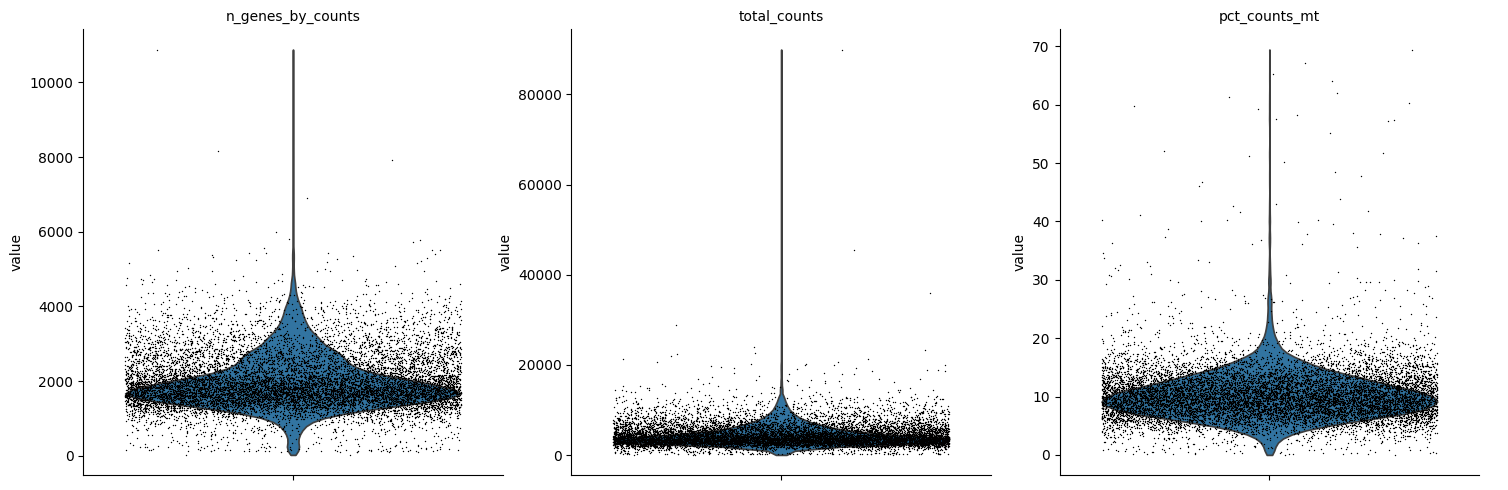

In [15]:
sc.pl.violin(rna, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [16]:
mu.pp.filter_var(rna, 'n_cells_by_counts', lambda x: x >= 3)
# This is analogous to
#   sc.pp.filter_genes(rna, min_cells=3)
# but does in-place filtering and avoids copying the object

In [17]:
mu.pp.filter_obs(rna, 'n_genes_by_counts', lambda x: (x >= 200) & (x < 5000))
# This is analogous to
#   sc.pp.filter_cells(rna, min_genes=200)
#   rna = rna[rna.obs.n_genes_by_counts < 5000, :]
# but does in-place filtering avoiding copying the object

mu.pp.filter_obs(rna, 'total_counts', lambda x: x < 15000)
mu.pp.filter_obs(rna, 'pct_counts_mt', lambda x: x < 20)

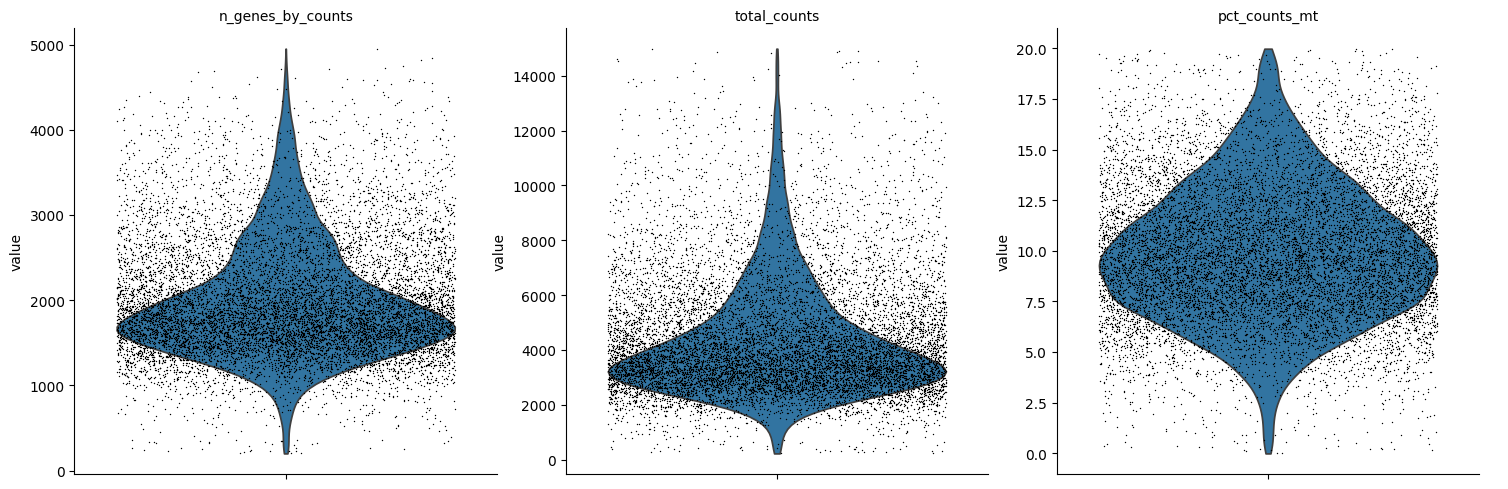

In [18]:
sc.pl.violin(rna, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [19]:
rna

AnnData object with n_obs × n_vars = 11565 × 26349
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [20]:
sc.pp.normalize_total(rna, target_sum=1e4)

In [21]:
sc.pp.log1p(rna)

In [22]:
sc.pp.highly_variable_genes(rna, min_mean=0.02, max_mean=4, min_disp=0.5)

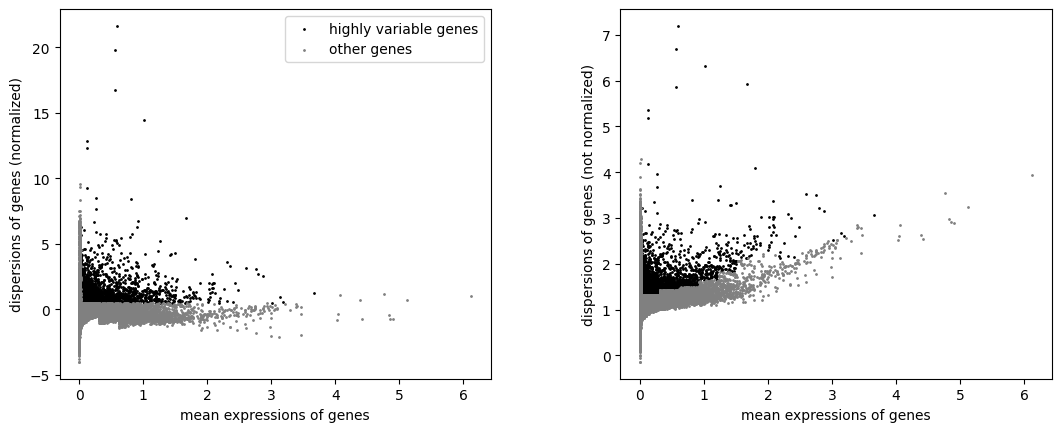

In [23]:
sc.pl.highly_variable_genes(rna)

In [24]:
np.sum(rna.var.highly_variable)

3026

In [25]:
rna.raw = rna
sc.pp.scale(rna, max_value=10)

In [26]:
rna

AnnData object with n_obs × n_vars = 11565 × 26349
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [27]:
sc.tl.pca(rna, svd_solver='arpack')

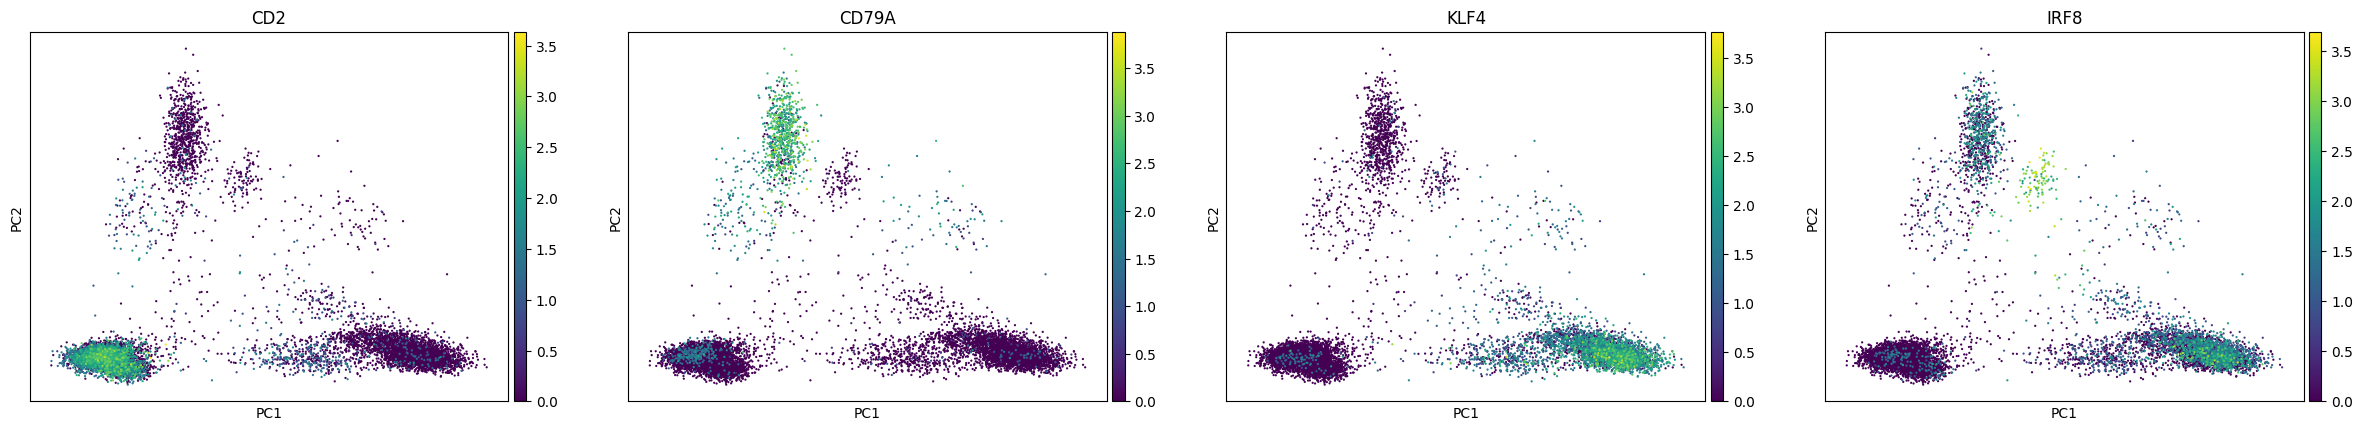

In [28]:
sc.pl.pca(rna, color=['CD2', 'CD79A', 'KLF4', 'IRF8'])

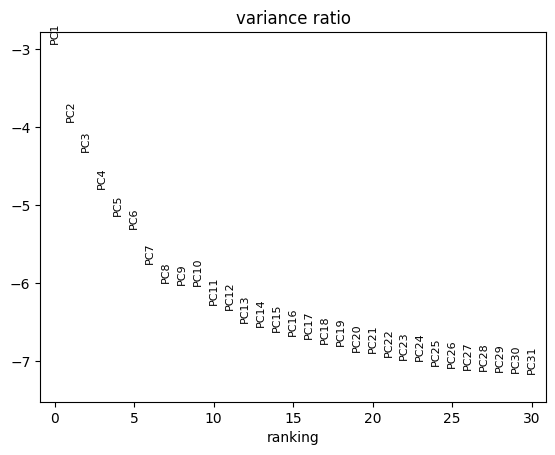

In [29]:
sc.pl.pca_variance_ratio(rna, log=True)

In [30]:
sc.pp.neighbors(rna, n_neighbors=10, n_pcs=20)

In [31]:
!pip install --q igraph
!pip install --q leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.0 MB/s eta 0:00:00


In [32]:
sc.tl.leiden(rna, resolution=.5)

<ipython-input-32-4f4ea7050700>:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(rna, resolution=.5)


In [33]:
sc.tl.umap(rna, spread=1., min_dist=.5, random_state=11)

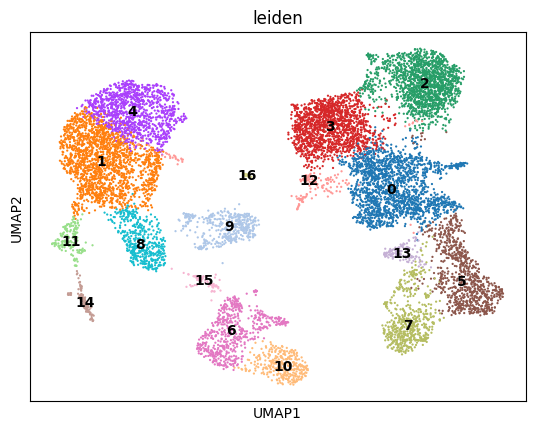

In [34]:
sc.pl.umap(rna, color="leiden", legend_loc="on data")

In [35]:
sc.tl.rank_genes_groups(rna, 'leiden', method='t-test')

In [36]:
result = rna.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.set_option('display.max_columns', 50)
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(10)

0_n            0_p      1_n  1_p     2_n  2_p     3_n            3_p  \
0    INPP4B   0.000000e+00   PLXDC2  0.0    LEF1  0.0    LEF1   0.000000e+00   
1      IL32   0.000000e+00   SLC8A1  0.0   BACH2  0.0  BCL11B   0.000000e+00   
2       LTB   0.000000e+00    NEAT1  0.0   PDE3B  0.0   BACH2   0.000000e+00   
3      ANK3   0.000000e+00     DPYD  0.0  THEMIS  0.0   CAMK4   0.000000e+00   
4     SYNE2   0.000000e+00     AOAH  0.0   NELL2  0.0    FHIT   0.000000e+00   
5    CDC14A   0.000000e+00     TYMP  0.0  BCL11B  0.0  MALAT1   0.000000e+00   
6      IL7R   0.000000e+00     JAK2  0.0   CAMK4  0.0  RPS27A   0.000000e+00   
7     ITGB1  3.993883e-312     FCN1  0.0  OXNAD1  0.0   RPS27  3.058650e-303   
8    BCL11B   0.000000e+00     ZEB2  0.0    CD8B  0.0    TCF7  2.565496e-269   
9  ARHGAP15   0.000000e+00  DENND1A  0.0     TXK  0.0    RPL3  2.818453e-296   

        4_n  4_p    5_n            5_p      6_n            6_p    7_n  \
0      VCAN  0.0   CCL5   0.000000e+00    BANK1   0.000000e+00   GNLY   
1    PLXDC2  0.0   NKG7  6.546785e-264     CD74   0.000000e+00   NKG7   
2      DPYD  0.0   IL32  5.707391e-285  RALGPS2  2.564295e-316  CD247   
3     LRMDA  0.0  SYNE2  2.601550e-216     AFF3  1.996293e-313   PRF1   
4  ARHGAP26  0.0  PRKCH  6.220673e-203    MS4A1  1.361487e-278  KLRD1   
5     NEAT1  0.0   GZMA  1.998589e-175  OSBPL10  8.911783e-228   GZMA   
6      FCN1  0.0  SKAP1  4.924029e-185  HLA-DRA  6.100716e-255  SYNE1   
7      ZEB2  0.0    A2M  9.922502e-164    CD79A  1.017954e-225  PRKCH   
8     CSF3R  0.0  HLA-B  8.705458e-170     PAX5  4.409138e-221   CTSW   
9     RBM47  0.0  SYNE1  7.294176e-161      BLK  1.280629e-195  MCTP2   

             7_p     8_n            8_p     9_n            9_p     10_n  \
0   0.000000e+00  TCF7L2   0.000000e+00   NEAT1  3.539271e-211     IGHM   
1  1.322679e-278    PSAP   0.000000e+00  PLXDC2  5.837106e-182     AFF3   
2  1.510340e-282     LYN   0.000000e+00    ZEB2  3.821996e-166    BANK1   
3  5.082463e-224    SAT1   0.000000e+00    LYST  2.413644e-152     CD74   
4  2.917588e-175   MTSS1  3.328203e-299    DPYD  2.703469e-156    FCRL1   
5  3.913506e-171    CST3  2.240082e-290  SLC8A1  3.767649e-141  RALGPS2   
6  4.917192e-165    WARS  6.677040e-283    TYMP  3.349480e-145  HLA-DRA   
7  8.991933e-170    CTSS  7.133490e-313     LYN  4.655640e-143    BACH2   
8  7.274825e-158   COTL1  6.555555e-276    FCN1  8.937257e-135     PAX5   
9  1.457125e-153    TYMP  1.182316e-294    AOAH  4.788457e-141    MS4A1   

            10_p      11_n           11_p   12_n          12_p     13_n  \
0  1.717845e-288      CD74  7.315006e-157  RPS29  6.906510e-18  SLC4A10   
1  7.544420e-270      CST3  1.627820e-113  RPS12  2.289791e-17  PHACTR2   
2  4.769392e-241  HLA-DRB1  1.382741e-106  RPS27  3.991699e-16     NKG7   
3  1.556839e-232   HLA-DRA  4.685487e-104  RPS14  1.433869e-14     RORA   
4  6.639292e-170  HLA-DPB1   1.316259e-98  RPL13  3.639875e-14    SYNE2   
5  3.628668e-166  HLA-DPA1   1.421543e-96  RPL30  6.934501e-13     IL7R   
6  5.218851e-177      ACTB   1.727218e-97  RPL32  2.669914e-11    SKAP1   
7  8.734900e-164    SAMHD1   1.704646e-95  RPS10  6.351072e-10      A2M   
8  3.466940e-149  HLA-DQB1   1.056027e-88  RPS26  8.183827e-10    KLRB1   
9  3.121569e-133     HDAC9   4.063751e-90  RPL41  8.222234e-10     CCL5   

           13_p      14_n           14_p     15_n          15_p    16_n  \
0  1.133609e-55      TCF4  2.131766e-108    BANK1  3.763641e-47    CDK6   
1  5.608209e-47      RHEX   9.108017e-85     AFF3  3.540132e-43   MAML3   
2  1.120088e-46      IRF8   2.498909e-83     CD74  4.056786e-40    SOX4   
3  2.642897e-42    FCHSD2   1.102102e-83   MARCH1  3.041280e-38  NKAIN2   
4  1.361929e-41      UGCG   2.849756e-78      LYN  1.349807e-37   RPLP0   
5  2.665097e-37      AFF3   3.814380e-81  HLA-DRA  1.141578e-35   RACK1   
6  2.172273e-37      CD74   5.871151e-85   PLXDC2  9.282739e-33  RNF220   
7  2.405910e-36      PLD4   6.527478e-73    MEF2C  5.807973e-31   ZNRF1

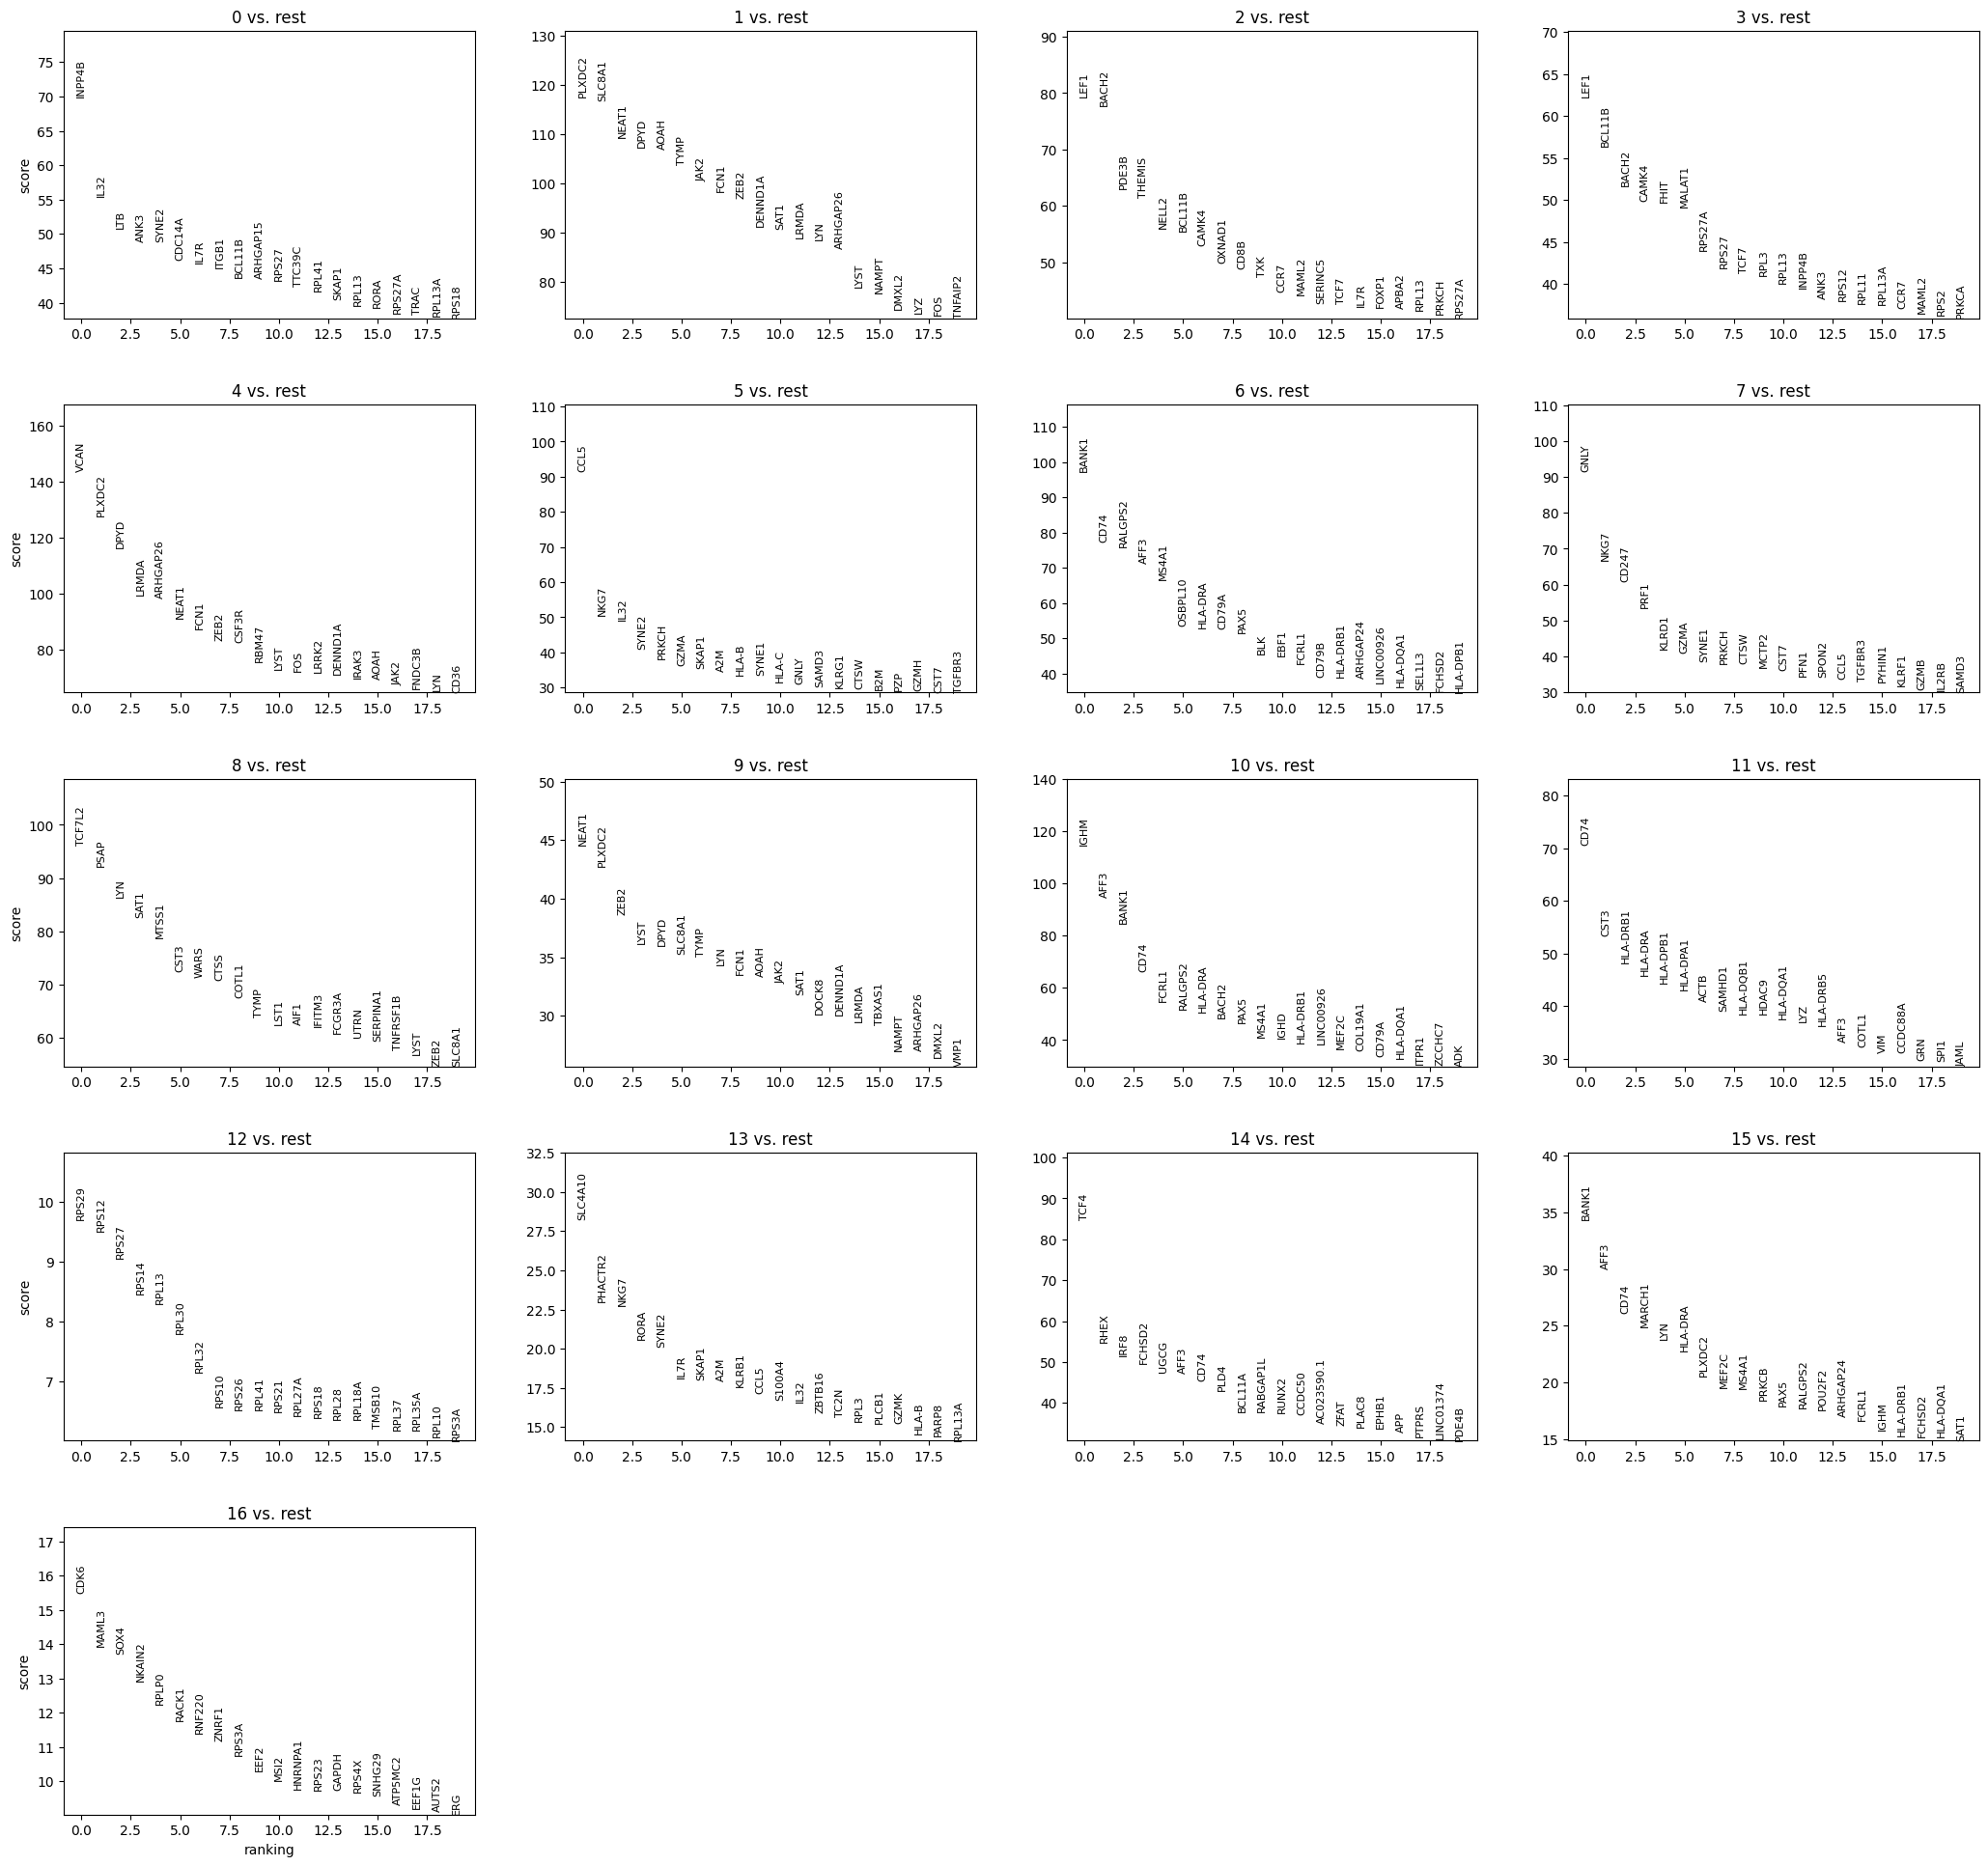

In [37]:
sc.pl.rank_genes_groups(rna, n_genes=20, sharey=False)

In [38]:
mu.pp.filter_obs(rna, "leiden", lambda x: ~x.isin(["9", "15", "12", "16"]))
# Analogous to
#   rna = rna[~rna.obs.leiden.isin(["9", "15", "12", "16"])]
# but doesn't copy the object

In [39]:
new_cluster_names = {
    "0": "CD4+ memory T", "1": "CD8+ naïve T", "3": "CD4+ naïve T",
    "5": "CD8+ activated T", "7": "NK", "13": "MAIT",
    "6": "memory B", "10": "naïve B",
    "4": "CD14 mono", "2": "intermediate mono", "8": "CD16 mono",
    "11": "mDC", "14": "pDC",
}

rna.obs['celltype'] = rna.obs.leiden.astype("str").values
rna.obs.celltype = rna.obs.celltype.astype("category")
rna.obs.celltype = rna.obs.celltype.cat.rename_categories(new_cluster_names)

In [40]:
rna.obs.celltype.cat.reorder_categories([
    'CD4+ naïve T', 'CD4+ memory T', 'MAIT',
    'CD8+ naïve T', 'CD8+ activated T', 'NK',
    'naïve B', 'memory B',
    'CD14 mono', 'intermediate mono', 'CD16 mono',
    'mDC', 'pDC'])

AAACAGCCAAGGAATC-1    intermediate mono
AAACAGCCAATCCCTT-1        CD4+ memory T
AAACAGCCAATGCGCT-1         CD4+ naïve T
AAACAGCCACCAACCG-1    intermediate mono
AAACAGCCAGGATAAC-1         CD4+ naïve T
                            ...        
TTTGTTGGTGTTAAAC-1    intermediate mono
TTTGTTGGTTAGGATT-1                   NK
TTTGTTGGTTGCAGTA-1        CD4+ memory T
TTTGTTGGTTGGTTAG-1        CD4+ memory T
TTTGTTGGTTTGCAGA-1     CD8+ activated T
Name: celltype, Length: 10881, dtype: category
Categories (13, object): ['CD4+ naïve T', 'CD4+ memory T', 'MAIT', 'CD8+ naïve T', ...,
                          'intermediate mono', 'CD16 mono', 'mDC', 'pDC']

In [41]:
rna.obs

n_genes_by_counts  total_counts  total_counts_mt  \
AAACAGCCAAGGAATC-1               3308        8380.0            626.0   
AAACAGCCAATCCCTT-1               1896        3771.0            397.0   
AAACAGCCAATGCGCT-1               2904        6876.0            444.0   
AAACAGCCACCAACCG-1               2282        5415.0            352.0   
AAACAGCCAGGATAAC-1               1353        2759.0            191.0   
...                               ...           ...              ...   
TTTGTTGGTGTTAAAC-1               1525        2866.0            317.0   
TTTGTTGGTTAGGATT-1               2024        4148.0            412.0   
TTTGTTGGTTGCAGTA-1               2116        4834.0            359.0   
TTTGTTGGTTGGTTAG-1               1620        2976.0            159.0   
TTTGTTGGTTTGCAGA-1               1920        4505.0            336.0   

                    pct_counts_mt leiden           celltype  
AAACAGCCAAGGAATC-1       7.470168      2  intermediate mono  
AAACAGCCAATCCCTT-1      10.527711      0      CD4+ memory T  
AAACAGCCAATGCGCT-1       6.457242      3       CD4+ naïve T  
AAACAGCCACCAACCG-1       6.500462      2  intermediate mono  
AAACAGCCAGGATAAC-1       6.922798      3       CD4+ naïve T  
...                           ...    ...                ...  
TTTGTTGGTGTTAAAC-1      11.060712      2  intermediate mono  
TTTGTTGGTTAGGATT-1       9.932498      7                 NK  
TTTGTTGGTTGCAGTA-1       7.426562      0      CD4+ memory T  
TTTGTTGGTTGGTTAG-1       5.342742      0      CD4+ memory T  
TTTGTTGGTTTGCAGA-1       7.458380      5   CD8+ activated T  

[10881 rows x 6 columns]

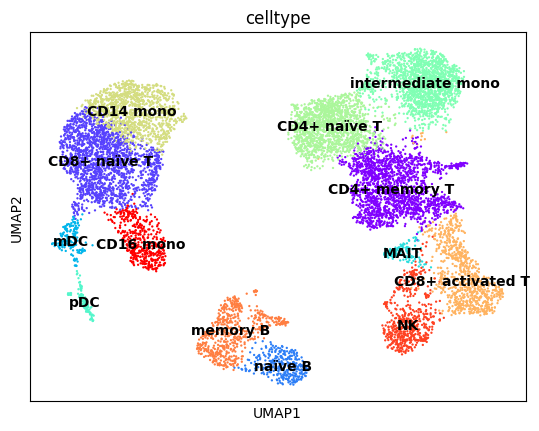

In [42]:
import matplotlib
import matplotlib.pyplot as plt

cmap = plt.get_cmap('rainbow')
colors = cmap(np.linspace(0, 1, len(rna.obs.celltype.cat.categories)))

rna.uns["celltype_colors"] = list(map(matplotlib.colors.to_hex, colors))

sc.pl.umap(rna, color="celltype", legend_loc="on data")

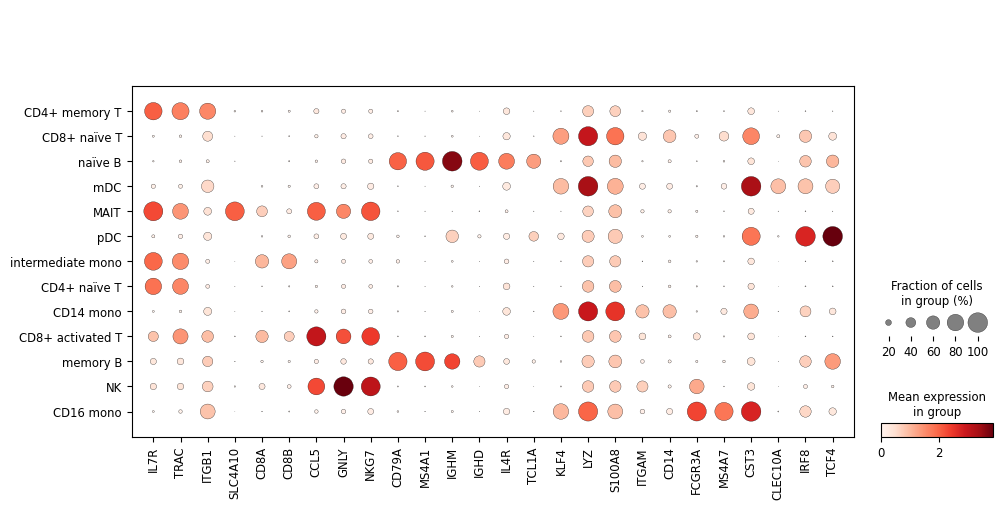

In [43]:
marker_genes = ['IL7R', 'TRAC',
                'ITGB1',
                'SLC4A10',
                'CD8A', 'CD8B', 'CCL5',
                'GNLY', 'NKG7',
                'CD79A', 'MS4A1', 'IGHM', 'IGHD',
                'IL4R', 'TCL1A',
                'KLF4', 'LYZ', 'S100A8', 'ITGAM',
                'CD14', 'FCGR3A', 'MS4A7',
                'CST3', 'CLEC10A', 'IRF8', 'TCF4']

sc.pl.dotplot(rna, marker_genes, groupby='celltype')

In [44]:
rna

AnnData object with n_obs × n_vars = 10881 × 26349
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'celltype'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'rank_genes_groups', 'celltype_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [45]:
mdata

MuData object with n_obs × n_vars = 11909 × 144978
  var:	'gene_ids', 'feature_types', 'genome', 'interval'
  2 modalities
    rna:	10881 x 26349
      obs:	'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'celltype'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'rank_genes_groups', 'celltype_colors'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      obsp:	'distances', 'connectivities'
    atac:	11909 x 108377
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
      uns:	'atac', 'files'

In [46]:
mdata.write("pbmc10k.h5mu")

/usr/local/lib/python3.11/dist-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/usr/local/lib/python3.11/dist-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)




---

# ATAC

In [47]:
atac = mdata.mod['atac']
atac

AnnData object with n_obs × n_vars = 11909 × 108377
    var: 'gene_ids', 'feature_types', 'genome', 'interval'
    uns: 'atac', 'files'

In [48]:
sc.pp.calculate_qc_metrics(atac, percent_top=None, log1p=False, inplace=True)

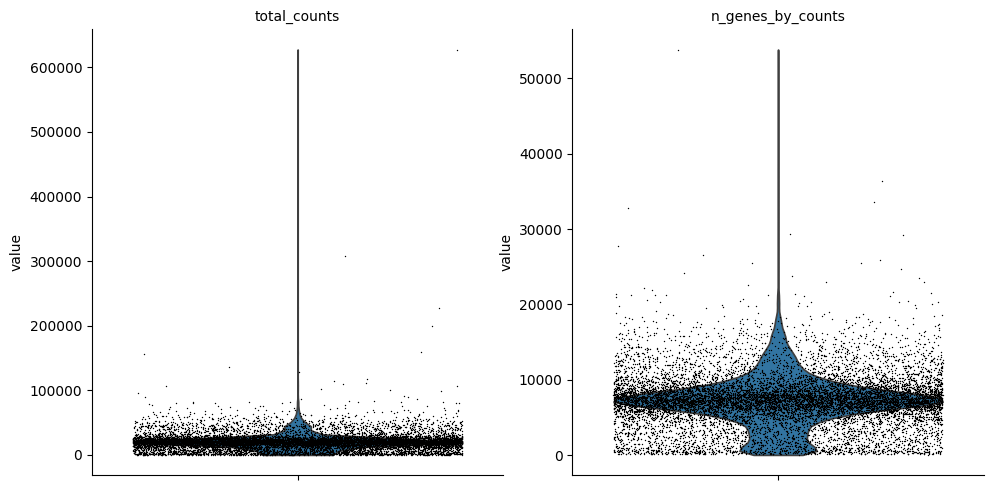

In [49]:
sc.pl.violin(atac, ['total_counts', 'n_genes_by_counts'], jitter=0.4, multi_panel=True)

In [50]:
# Filter peaks which expression is not detected
mu.pp.filter_var(atac, 'n_cells_by_counts', lambda x: x >= 10)

In [51]:
# Filter cells
mu.pp.filter_obs(atac, 'n_genes_by_counts', lambda x: (x >= 2000) & (x <= 15000))
mu.pp.filter_obs(atac, 'total_counts', lambda x: (x >= 4000) & (x <= 40000))

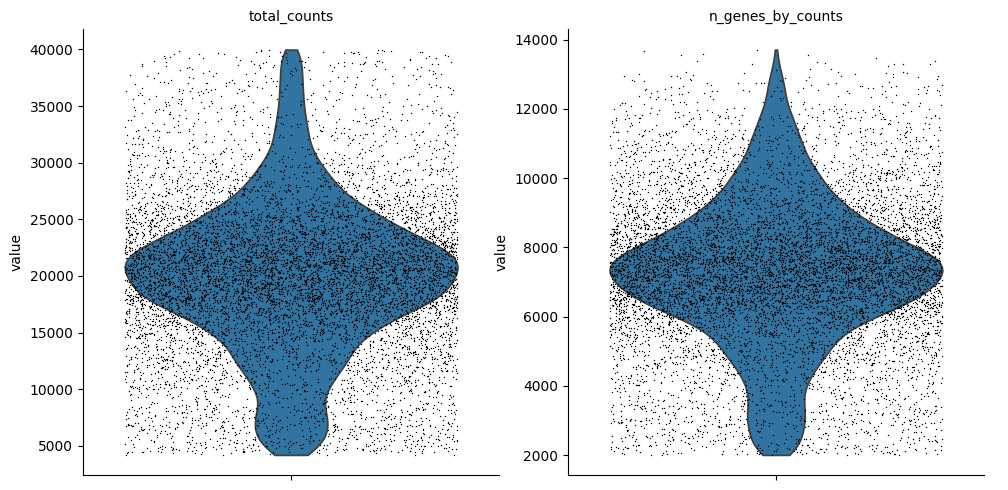

In [52]:
sc.pl.violin(atac, ['total_counts', 'n_genes_by_counts'], jitter=0.4, multi_panel=True)

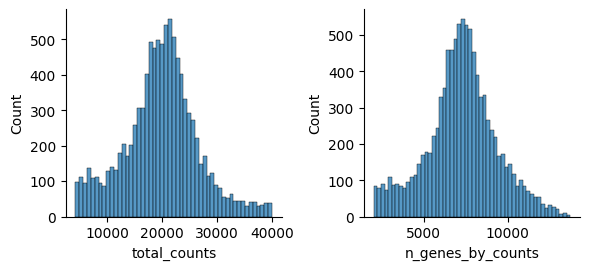

In [53]:
mu.pl.histogram(atac, ['total_counts', 'n_genes_by_counts'])

In [54]:
atac

AnnData object with n_obs × n_vars = 10069 × 106086
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'atac', 'files'

In [55]:
!pip install --q pysam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.0/26.0 MB 65.2 MB/s eta 0:00:00


In [56]:
from muon import atac as ac

Fetching Regions...: 100%|██████████| 1/1 [00:02<00:00,  2.09s/it]


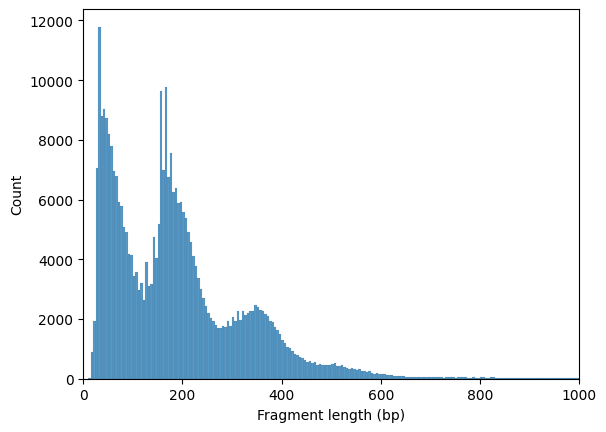

In [57]:
atac.obs['NS']=1
ac.pl.fragment_histogram(atac, region='chr1:1-2000000')

In [58]:
ac.tl.nucleosome_signal(atac, n=1e6)

Reading Fragments: 100%|██████████| 1000000/1000000 [00:03<00:00, 301360.51it/s]


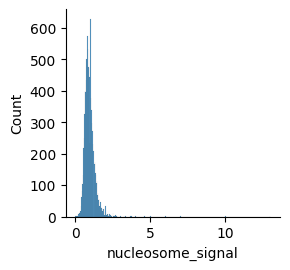

In [59]:
mu.pl.histogram(atac, "nucleosome_signal", kde=False)

In [60]:
ac.tl.get_gene_annotation_from_rna(mdata['rna']).head(3)  # accepts MuData with 'rna' modality or mdata['rna'] AnnData directly

Chromosome   Start     End          gene_id   gene_name
AL627309.1       chr1  120931  133723  ENSG00000238009  AL627309.1
AL627309.5       chr1  149706  173862  ENSG00000241860  AL627309.5
AL627309.4       chr1  160445  160446  ENSG00000241599  AL627309.4

In [61]:
tss = ac.tl.tss_enrichment(mdata, n_tss=1000)  # by default, features=ac.tl.get_gene_annotation_from_rna(mdata)
tss

Fetching Regions...: 100%|██████████| 1000/1000 [00:19<00:00, 52.15it/s]
/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 10069 × 2001
    obs: 'n_genes_by_counts', 'total_counts', 'NS', 'nucleosome_signal', 'tss_score'
    var: 'TSS_position'

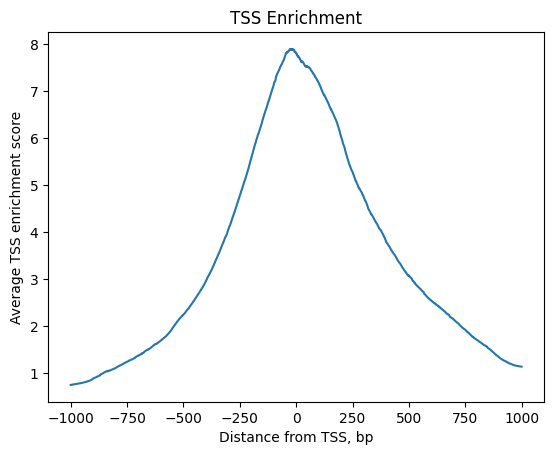

In [62]:
ac.pl.tss_enrichment(tss)

In [63]:
# Save original counts
atac.layers["counts"] = atac.X

In [64]:
ac.pp.tfidf(atac, scale_factor=1e4)

In [65]:
sc.pp.normalize_per_cell(atac, counts_per_cell_after=1e4)
sc.pp.log1p(atac)

<ipython-input-65-c4060b2973a3>:1: FutureWarning: Use sc.pp.normalize_total instead
  sc.pp.normalize_per_cell(atac, counts_per_cell_after=1e4)
/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_simple.py:588: FutureWarning: Use sc.pp.normalize_total instead
  normalize_per_cell(


In [66]:
sc.pp.highly_variable_genes(atac, min_mean=0.05, max_mean=1.5, min_disp=.5)

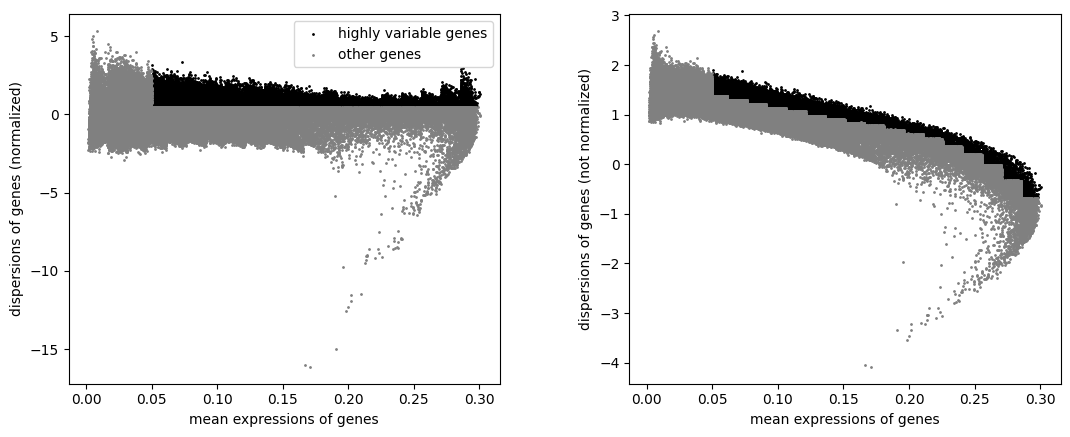

In [67]:
sc.pl.highly_variable_genes(atac)

In [68]:
np.sum(atac.var.highly_variable)

19430

In [69]:
atac.raw = atac

In [70]:
atac.obs

n_genes_by_counts  total_counts  NS  nucleosome_signal  \
AAACAGCCAATCCCTT-1               7253       20495.0   1           0.769231   
AAACAGCCAATGCGCT-1               6528       16674.0   1           1.333333   
AAACAGCCACCAACCG-1               3323        7658.0   1           0.800000   
AAACAGCCAGGATAAC-1               4267       10355.0   1           0.562500   
AAACAGCCAGTAGGTG-1              11633       39454.0   1           0.840000   
...                               ...           ...  ..                ...   
TTTGTTGGTGACATGC-1               5718       15272.0   1           1.476190   
TTTGTTGGTGTTAAAC-1               6629       17869.0   1           0.638889   
TTTGTTGGTTAGGATT-1               4267       10558.0   1           0.941176   
TTTGTTGGTTGGTTAG-1               6367       17054.0   1           1.107143   
TTTGTTGGTTTGCAGA-1               7574       22729.0   1           0.657143   

                    tss_score     n_counts  
AAACAGCCAATCCCTT-1   2.667005  6072.373535  
AAACAGCCAATGCGCT-1   3.450756  6609.848633  
AAACAGCCACCAACCG-1   8.906611  4892.564941  
AAACAGCCAGGATAAC-1   6.637142  5088.182617  
AAACAGCCAGTAGGTG-1   4.460259  7149.872070  
...                       ...          ...  
TTTGTTGGTGACATGC-1   4.266250  5509.185547  
TTTGTTGGTGTTAAAC-1   2.709174  6350.276855  
TTTGTTGGTTAGGATT-1   4.149198  5335.365723  
TTTGTTGGTTGGTTAG-1   4.287674  6143.921387  
TTTGTTGGTTTGCAGA-1   5.022488  5906.115234  

[10069 rows x 6 columns]

In [71]:
atac.var

gene_ids feature_types  genome  \
chr1:10109-10357              chr1:10109-10357         Peaks  GRCh38   
chr1:180730-181630          chr1:180730-181630         Peaks  GRCh38   
chr1:191491-191736          chr1:191491-191736         Peaks  GRCh38   
chr1:267816-268196          chr1:267816-268196         Peaks  GRCh38   
chr1:586028-586373          chr1:586028-586373         Peaks  GRCh38   
...                                        ...           ...     ...   
KI270713.1:20444-22615  KI270713.1:20444-22615         Peaks  GRCh38   
KI270713.1:27118-28927  KI270713.1:27118-28927         Peaks  GRCh38   
KI270713.1:29485-30706  KI270713.1:29485-30706         Peaks  GRCh38   
KI270713.1:31511-32072  KI270713.1:31511-32072         Peaks  GRCh38   
KI270713.1:37129-37638  KI270713.1:37129-37638         Peaks  GRCh38   

                                      interval  n_cells_by_counts  \
chr1:10109-10357              chr1:10109-10357                 85   
chr1:180730-181630          chr1:180730-181630                187   
chr1:191491-191736          chr1:191491-191736                 61   
chr1:267816-268196          chr1:267816-268196                122   
chr1:586028-586373          chr1:586028-586373                 81   
...                                        ...                ...   
KI270713.1:20444-22615  KI270713.1:20444-22615               5182   
KI270713.1:27118-28927  KI270713.1:27118-28927                349   
KI270713.1:29485-30706  KI270713.1:29485-30706                410   
KI270713.1:31511-32072  KI270713.1:31511-32072                155   
KI270713.1:37129-37638  KI270713.1:37129-37638                246   

                        mean_counts  pct_dropout_by_counts  total_counts  \
chr1:10109-10357           0.010916              99.286254         130.0   
chr1:180730-181630         0.028886              98.429759         344.0   
chr1:191491-191736         0.006886              99.487782          82.0   
chr1:267816-268196         0.019901              98.975565         237.0   
chr1:586028-586373         0.013603              99.319842         162.0   
...                             ...                    ...           ...   
KI270713.1:20444-22615     1.317827              56.486691       15694.0   
KI270713.1:27118-28927     0.056176              97.069443         669.0   
KI270713.1:29485-30706     0.067764              96.557226         807.0   
KI270713.1:31511-32072     0.021496              98.698463         256.0   
KI270713.1:37129-37638     0.042573              97.934335         507.0   

                        highly_variable     means  dispersions  \
chr1:10109-10357                  False  0.026752     1.774558   
chr1:180730-181630                False  0.048830     1.391417   
chr1:191491-191736                False  0.016919     1.575534   
chr1:267816-268196                False  0.030394     1.336870   
chr1:586028-586373                False  0.026925     1.621163   
...                                 ...       ...          ...   
KI270713.1:20444-22615            False  0.272452    -0.606115   
KI270713.1:27118-28927             True  0.077255     1.234199   
KI270713.1:29485-30706            False  0.084304     1.158702   
KI270713.1:31511-32072            False  0.043408     1.460604   
KI270713.1:37129-37638            False  0.049353     1.082345   

                        dispersions_norm  
chr1:10109-10357                2.197926  
chr1:180730-181630              0.585073  
chr1:191491-191736              1.060551  
chr1:267816-268196             -0.303365  
chr1:586028-586373              1.321310  
...                                  ...  
KI270713.1:20444-22615         -0.245598  
KI270713.1:27118-28927          0.576150  
KI270713.1:29485-30706          0.221221  
KI270713.1:31511-32072          0.488107  
KI270713.1:37129-37638         -0.974971  

[106086 rows x 12 columns]

In [72]:
ac.tl.lsi(atac)

In [73]:
atac

AnnData object with n_obs × n_vars = 10069 × 106086
    obs: 'n_genes_by_counts', 'total_counts', 'NS', 'nucleosome_signal', 'tss_score', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'atac', 'files', 'log1p', 'hvg', 'lsi'
    obsm: 'X_lsi'
    varm: 'LSI'
    layers: 'counts'

In [74]:
atac.obsm['X_lsi'] = atac.obsm['X_lsi'][:,1:]
atac.varm["LSI"] = atac.varm["LSI"][:,1:]
atac.uns["lsi"]["stdev"] = atac.uns["lsi"]["stdev"][1:]

In [75]:
sc.pp.scale(atac)
sc.tl.pca(atac)

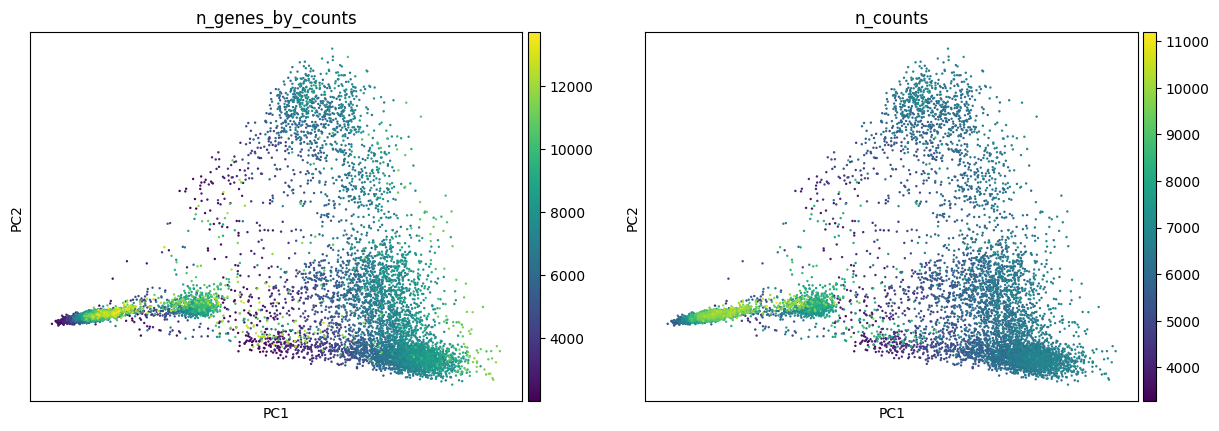

In [76]:
sc.pl.pca(atac, color=["n_genes_by_counts", "n_counts"])

In [77]:
atac.uns['atac']['peak_annotation'].tail()
# Alternatively add peak annotation from a TSV file
# ac.tl.add_peak_annotation(atac, annotation="data/pbmc10k/atac_peak_annotation.tsv")

peak  distance peak_type
gene_name                                             
AC213203.2  KI270713.1:20444-22615      9913    distal
AC213203.2  KI270713.1:27118-28927      3601    distal
AC213203.2  KI270713.1:29485-30706      1822    distal
AC213203.2  KI270713.1:31511-32072       456    distal
AC213203.1  KI270713.1:37129-37638      1723    distal

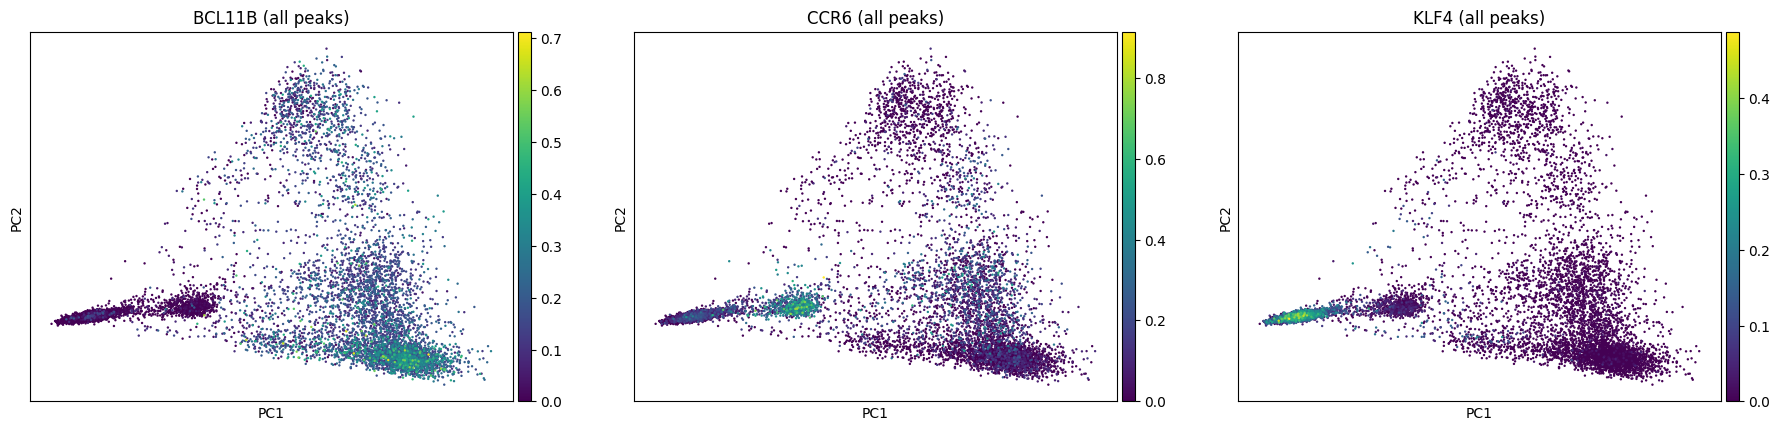

In [78]:
ac.pl.pca(atac, color=["BCL11B", "CCR6", "KLF4"], average="total")

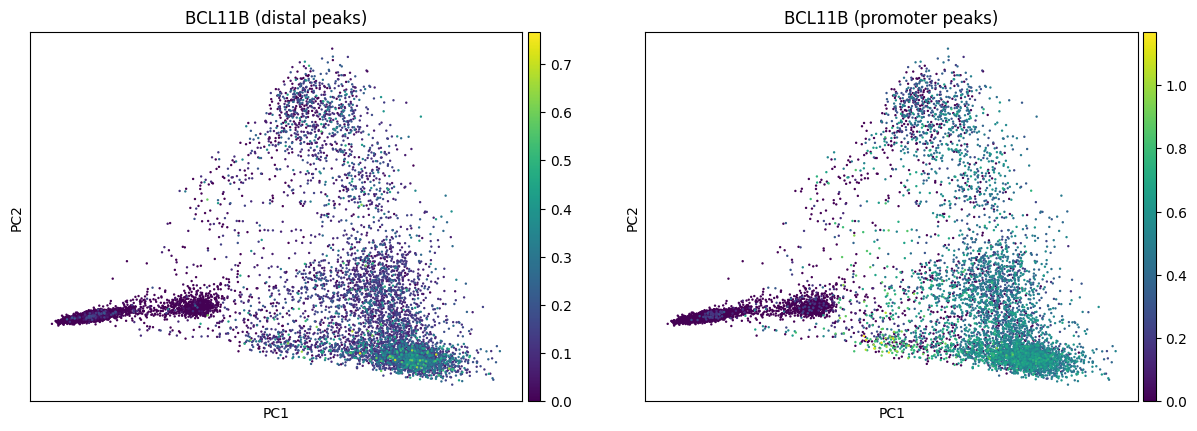

In [79]:
ac.pl.pca(atac, color="BCL11B", average="peak_type")

In [80]:
sc.pp.neighbors(atac, n_neighbors=10, n_pcs=30)

In [81]:
sc.tl.leiden(atac, resolution=.5)

In [82]:
sc.tl.umap(atac, spread=1.5, min_dist=.5, random_state=20)

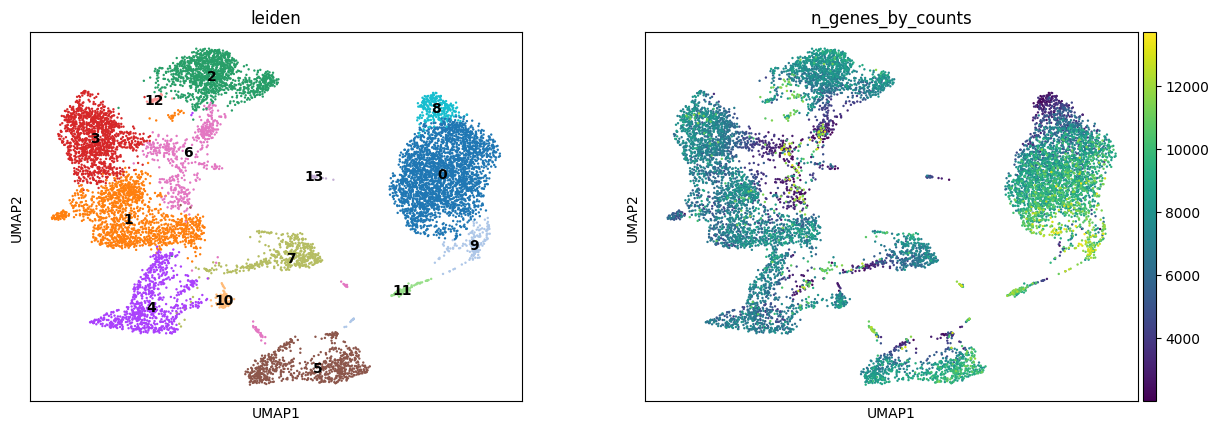

In [83]:
sc.pl.umap(atac, color=["leiden", "n_genes_by_counts"], legend_loc="on data")

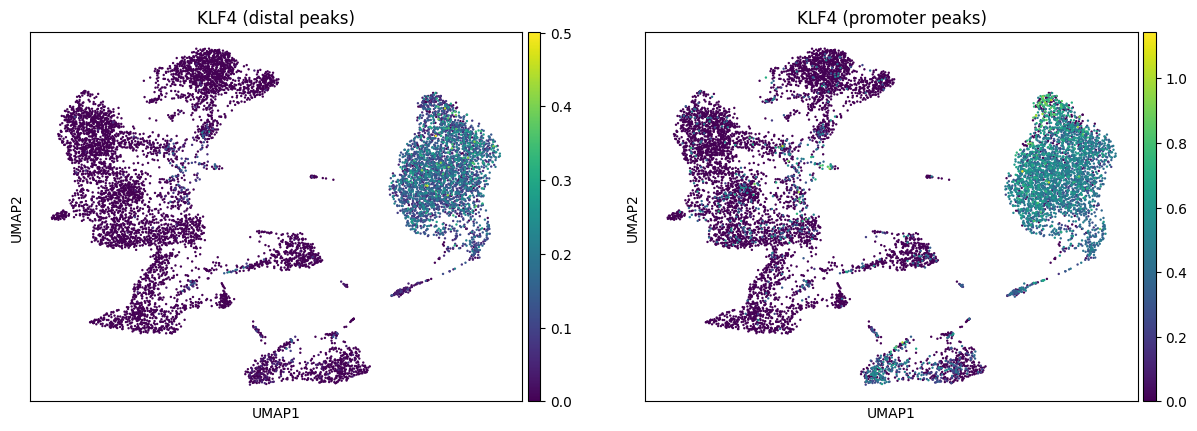

In [84]:
ac.pl.umap(atac, color=["KLF4"], average="peak_type")

In [85]:
ac.tl.rank_peaks_groups(atac, 'leiden', method='t-test')

In [86]:
result = atac.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'genes', 'pvals']}).head(10)

0_n                    0_g  0_p  \
0  chr9:107480158-107492721                   KLF4  0.0   
1   chr20:50269694-50277398                 SMIM25  0.0   
2   chr22:38950570-38958424               APOBEC3A  0.0   
3  chr1:182143071-182150314  LINC01344, AL390856.1  0.0   
4      chr5:1476663-1483241         SLC6A3, LPCAT1  0.0   
5  chr9:134369462-134387253                   RXRA  0.0   
6    chr3:72092464-72103763              LINC00877  0.0   
7     chr20:1943201-1947850               PDYN-AS1  0.0   
8    chr6:41280331-41287503                  TREM1  0.0   
9    chr2:47067863-47077814      TTC7A, AC073283.1  0.0   

                        1_n  \
0   chr14:22536559-22563070   
1     chr10:8041366-8062418   
2   chr14:99255246-99275454   
3  chr7:142782798-142813716   
4   chr14:91240967-91256390   
5   chr14:99223600-99254668   
6   chr20:59157931-59168100   
7    chr5:35850992-35860227   
8    chr6:37512323-37518673   
9   chr10:33135632-33141841   

                                                 1_g            1_p  \
0  TRAJ7, TRAJ6, TRAJ5, TRAJ4, TRAJ3, TRAJ2, TRAJ...  3.566748e-284   
1                       GATA3, GATA3-AS1, AL390294.1  1.266623e-185   
2                                 BCL11B, AL109767.1  1.707106e-178   
3  TRBC1, TRBJ2-1, TRBJ2-2, TRBJ2-2P, TRBJ2-3, TR...  2.686383e-169   
4                                  GPR68, AL135818.1  2.419059e-154   
5                                 BCL11B, AL109767.1  9.990919e-147   
6                                             ZNF831  3.847715e-138   
7                                               IL7R  1.649505e-135   
8                                          LINC02520  5.174838e-132   
9                                              IATPR  8.533438e-126   

                         2_n                 2_g            2_p  \
0     chr2:86783559-86792275                CD8A   0.000000e+00   
1    chr11:66311352-66319301   CD248, AP001107.3  8.503169e-285   
2    chr14:99255246-99275454  BCL11B, AL109767.1  2.687346e-286   
3    chr12:10552886-10555668           LINC02446  6.464371e-228   
4   chr2:136122469-136138482               CXCR4  1.168920e-249   
5    chr14:99181080-99219442  BCL11B, AL162151.1  2.869161e-235   
6    chr14:99223600-99254668  BCL11B, AL109767.1  1.531147e-220   
7     chr1:24500773-24509089      RCAN3, RCAN3AS  1.434354e-211   
8    chr17:82125073-82129615              CCDC57  1.754797e-202   
9  chr11:118906756-118931379               BCL9L  2.842891e-210   

                        3_n  \
0   chr14:99255246-99275454   
1   chr14:99223600-99254668   
2   chr14:99181080-99219442   
3   chr14:22536559-22563070   
4  chr7:142782798-142813716   
5   chr19:16363226-16378669   
6   chr17:82125073-82129615   
7   chr17:40601555-40611036   
8    chr8:30067057-30102417   
9     chr19:1061757-1096608   

                                                 3_g            3_p  \
0                                 BCL11B, AL109767.1  5.323219e-279   
1                                 BCL11B, AL109767.1  3.886121e-210   
2                                 BCL11B, AL162151.1  2.118143e-181   
3  TRAJ7, TRAJ6, TRAJ5, TRAJ4, TRAJ3, TRAJ2, TRAJ...  1.180259e-187   
4  TRBC1, TRBJ2-1, TRBJ2-2, TRBJ2-2P, TRBJ2-3, TR...  2.681539e-182   
5                                EPS15L1, AC020917.3  4.264816e-172   
6                                             CCDC57  1.191222e-158   
7                                            SMARCE1  4.064837e-158   
8                        LEPROTL1, SARAF, AC044849.1  3.466704e-162   
9                            ABCA7, POLR2E, ARHGAP45  3.041762e-161   

                        4_n                                    4_g  \
0    chr1:24909406-24919504                                  RUNX3   
1  chr2:144507361-144525092  ZEB2, LINC01412, ZEB2-AS1, AC009951.6   
2      chr4:6198055-6202103                       JAKMIP1, C4orf50   
3  chr2:241762278-241764383                     D2HGDH, AC114730.2   
4   chr20:24948563-24956577           

In [87]:
mu.pp.filter_obs(atac, "leiden", lambda x: ~x.isin(["6", "13"]))

In [88]:
new_cluster_names = {
    "1": "CD4+ memory T", "2": "CD8+ naïve T", "3": "CD4+ naïve T",
    "4": "CD8+ activated T", "7": "NK", "10": "MAIT",
    "5": "memory B",
    "0": "intermediate mono",  "8": "CD16 mono",
    "9": "mDC", "11": "pDC",
}

atac.obs['celltype'] = atac.obs.leiden.astype("str").values
atac.obs.celltype = atac.obs.celltype.astype("category").cat.rename_categories(new_cluster_names)

<ipython-input-88-d8303d5fc134>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atac.obs['celltype'] = atac.obs.leiden.astype("str").values
<ipython-input-88-d8303d5fc134>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atac.obs.celltype = atac.obs.celltype.astype("category").cat.rename_categories(new_cluster_names)


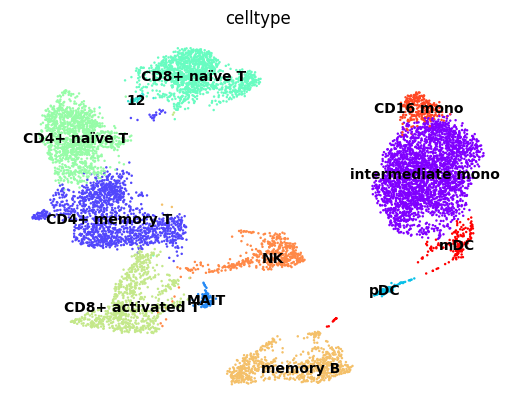

In [91]:
cmap = plt.get_cmap('rainbow')
colors = cmap(np.linspace(0, 1, len(atac.obs.celltype.cat.categories)))

atac.uns["celltype_colors"] = list(map(matplotlib.colors.to_hex, colors))
sc.pl.umap(atac, color="celltype", legend_loc="on data", frameon=False)

In [94]:
marker_genes = ['IL7R', 'TRAC',
                'GATA3',
                'SLC4A10',
                'CD8A', 'CD8B', 'CD248', 'CCL5',
                'GNLY', 'NKG7',
                'CD79A', 'MS4A1', 'IGHD', 'IGHM', 'TNFRSF13C',
                'IL4R', 'KLF4', 'LYZ', 'S100A8', 'ITGAM', 'CD14',
                'FCGR3A', 'MS4A7', 'CST3',
                'CLEC10A', 'IRF8', 'TCF4']

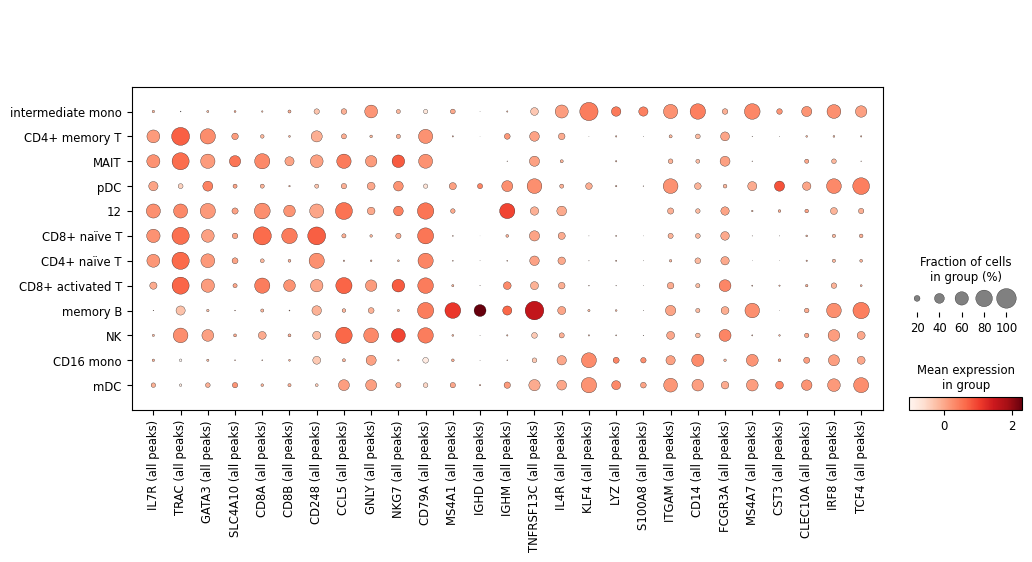

In [95]:
ac.pl.dotplot(atac, marker_genes, groupby='celltype')

In [96]:
mdata

MuData object with n_obs × n_vars = 11909 × 134726
  var:	'gene_ids', 'feature_types', 'genome', 'interval'
  2 modalities
    rna:	10881 x 26349
      obs:	'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'celltype'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'rank_genes_groups', 'celltype_colors'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      obsp:	'distances', 'connectivities'
    atac:	9525 x 106086
      obs:	'n_genes_by_counts', 'total_counts', 'NS', 'nucleosome_signal', 'tss_score', 'n_counts', 'leiden', 'celltype'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'atac', 'files', 'log1p', 'hvg', 'lsi', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'rank_genes_groups', 'celltype_colors'
      obsm:	'X_lsi', 'X_pca', 'X_umap'
      varm:	'LSI', 'PCs'
      layers:	'counts'
      obsp:	'distances', 'connectivities'

In [97]:
mu.pp.intersect_obs(mdata)
mdata

/usr/local/lib/python3.11/dist-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


MuData object with n_obs × n_vars = 9221 × 134726
  var:	'gene_ids', 'feature_types', 'genome', 'interval'
  2 modalities
    rna:	9221 x 26349
      obs:	'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'celltype'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'rank_genes_groups', 'celltype_colors'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      obsp:	'distances', 'connectivities'
    atac:	9221 x 106086
      obs:	'n_genes_by_counts', 'total_counts', 'NS', 'nucleosome_signal', 'tss_score', 'n_counts', 'leiden', 'celltype'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'atac', 'files', 'log1p', 'hvg', 'lsi', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'rank_genes_groups', 'celltype_colors'
      obsm:	'X_lsi', 'X_pca', 'X_umap'
      varm:	'LSI', 'PCs'
      layers:	'counts'
      obsp:	'distances', 'connectivities'

In [98]:
from sklearn.metrics import adjusted_rand_score as ari
ari(mdata.obs['rna:celltype'], mdata.obs['atac:celltype'])

0.6903825620556057

In [99]:
# Calculate total number of cells of respective ATAC celltypes
df_total = (
    mdata.obs.groupby("atac:celltype").
        size().
        reset_index(name="n_total").
        set_index("atac:celltype")
)

# Calculate number of cells for each pair of RNA-ATAC celltype annotation
df = (
    mdata.obs.groupby(["atac:celltype", "rna:celltype"]).
        size().
        reset_index(name="n").
        set_index("atac:celltype").
        join(df_total).
        reset_index()
)

# Calculate a fraction of cells of each RNA celltype (n)
# for each ATAC celltype (/ n_total)
df_frac = df.assign(frac = lambda x: x.n / x.n_total)

<ipython-input-99-96a6b4cf1883>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mdata.obs.groupby("atac:celltype").
<ipython-input-99-96a6b4cf1883>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mdata.obs.groupby(["atac:celltype", "rna:celltype"]).


In [100]:
df_wide = df_frac.set_index("atac:celltype").pivot(columns="rna:celltype", values="frac")

<Axes: xlabel='rna:celltype', ylabel='atac:celltype'>

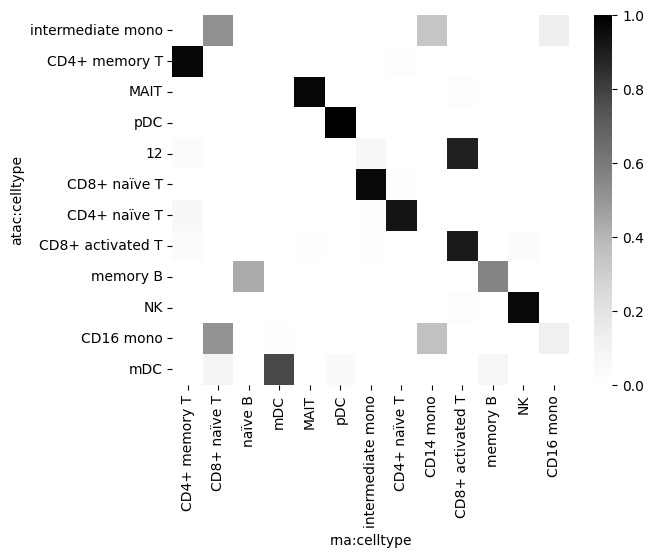

In [101]:
import seaborn as sns
sns.heatmap(df_wide, cmap="Greys")

In [103]:
!pip install --q mofapy2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.3 MB/s eta 0:00:00


In [104]:
mu.tl.mofa(mdata, outfile="pbmc10k_rna_atac.hdf5")


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='rna' group='group1' with N=9221 samples and D=26349 features...
Loaded view='atac' group='group1' with N=9221 samples and D=106086 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights

ValueError: Value passed for key 'LFs' is of incorrect shape. Values of varm must match dimensions ('var',) of parent. Value had shape (132435,) while it should have had (134726,).

In [105]:
mdata

MuData object with n_obs × n_vars = 9221 × 134726
  var:	'gene_ids', 'feature_types', 'genome', 'interval'
  obsm:	'X_mofa'
  2 modalities
    rna:	9221 x 26349
      obs:	'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'celltype'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'rank_genes_groups', 'celltype_colors'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      obsp:	'distances', 'connectivities'
    atac:	9221 x 106086
      obs:	'n_genes_by_counts', 'total_counts', 'NS', 'nucleosome_signal', 'tss_score', 'n_counts', 'leiden', 'celltype'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'atac', 'files', 'log1p', 'hvg', 'lsi', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'rank_genes_groups', 'celltype_colors'
      obsm:	'X_lsi', 'X_pca', 'X_umap'
      varm:	'LSI', 'PCs'
      layers:	'counts'
      obsp:	'distances', 'connectivities'

In [108]:
mdata.obsm['X_mofa']

array([[-1.78275005, -1.11128955,  0.60041645, ...,  1.37354852,
         1.42292663,  0.17930093],
       [-1.53355065, -1.05287531, -2.84289428, ..., -0.85756406,
         0.03327306, -0.07434999],
       [-1.59472813, -1.38471935, -2.9153488 , ..., -1.33515033,
        -1.51686935,  0.13691712],
       ...,
       [-1.44667271, -1.17996081,  8.39936617, ..., -1.55007997,
        -3.28441099,  0.20274884],
       [-1.6095583 , -1.11988226, -0.81819542, ...,  0.32644993,
        -1.24804092, -0.24888046],
       [-2.03665147, -1.28334219,  0.45636844, ...,  0.27355668,
         2.37537315, -0.0704904 ]])

In [109]:
mdata.obsm['X_mofa'].shape

(9221, 10)

In [110]:
mdata.uns = mdata.uns or dict()
mdata.uns['rna:celltype_colors'] = mdata['rna'].uns['celltype_colors']
mdata.uns['atac:celltype_colors'] = mdata['atac'].uns['celltype_colors']

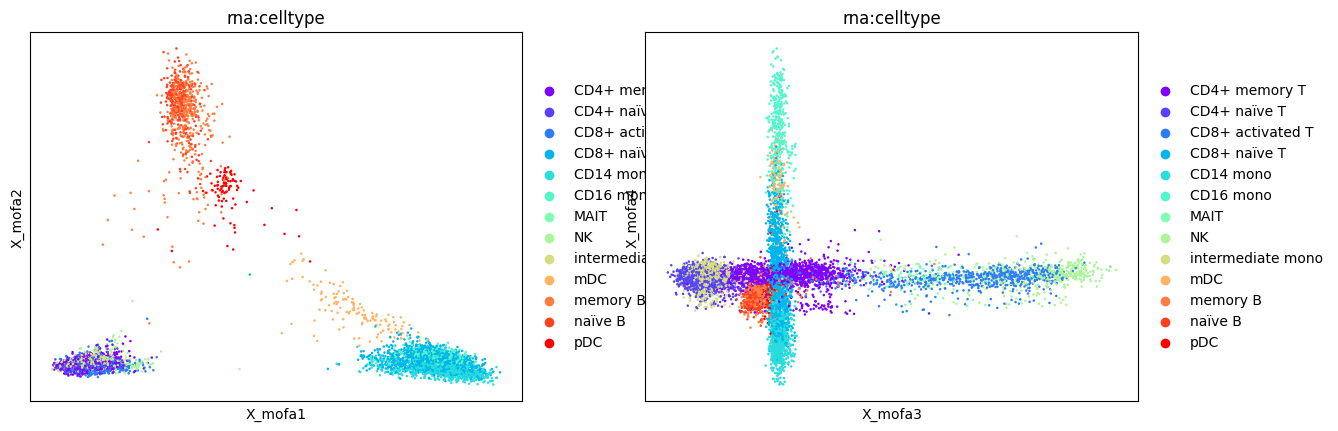

In [111]:
mu.pl.mofa(mdata, color="rna:celltype", components=["1,2", "3,4"])

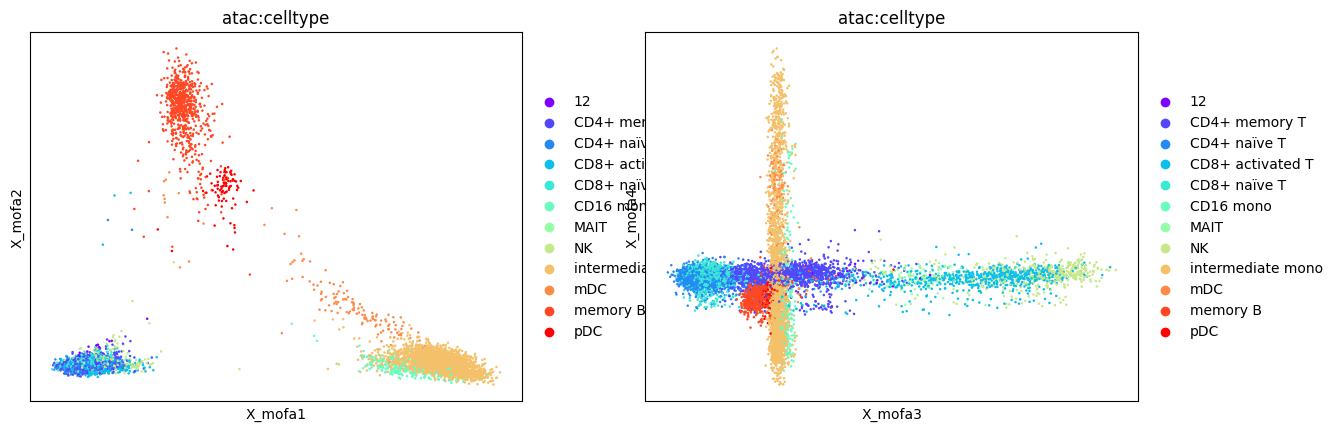

In [112]:
mu.pl.mofa(mdata, color="atac:celltype", components=["1,2", "3,4"])

In [113]:
sc.pp.neighbors(mdata, use_rep="X_mofa")
sc.tl.umap(mdata)

In [114]:
sc.tl.umap(mdata, min_dist=.2, spread=1., random_state=10)

In [115]:
sc.tl.leiden(mdata, key_added='leiden_joint')

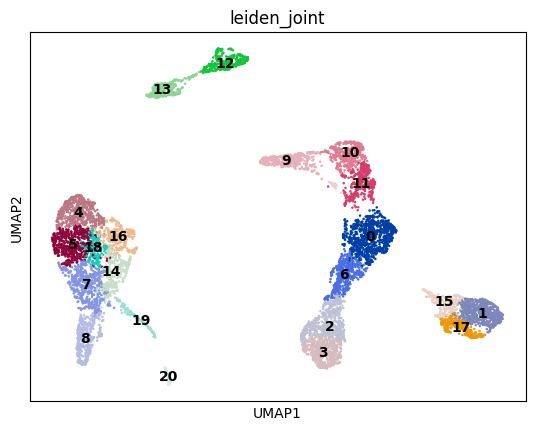

In [116]:
sc.pl.umap(mdata, color="leiden_joint", legend_loc='on data')

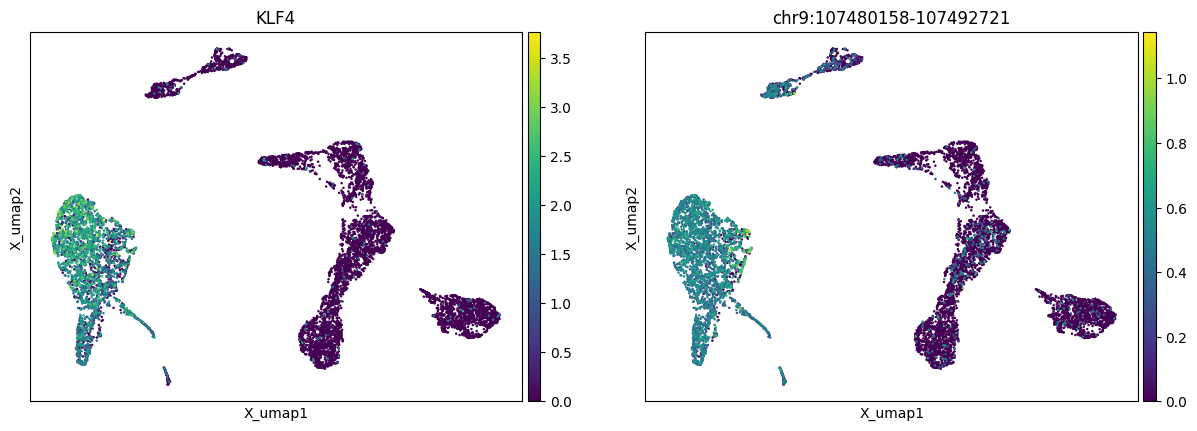

In [117]:
mu.pl.umap(mdata, color=["KLF4", "chr9:107480158-107492721"])

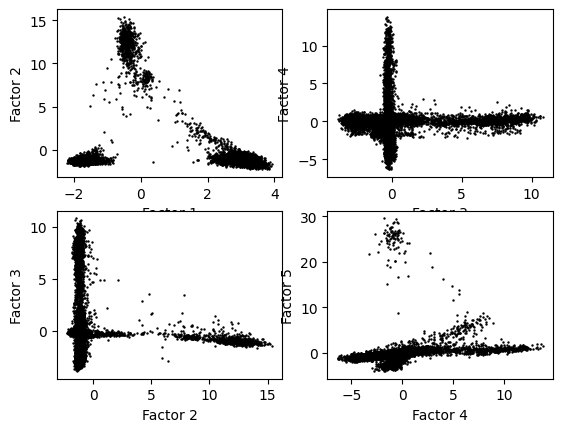

In [118]:
df = pd.DataFrame(mdata.obsm["X_mofa"])
df.columns = [f"Factor {i+1}" for i in range(df.shape[1])]

plot_scatter = lambda i, ax: sns.scatterplot(data=df, x=f"Factor {i+1}", y=f"Factor {i+2}", color="black", linewidth=0, s=3, ax=ax)

fig, axes = plt.subplots(2, 2)
for i in range(4):
    plot_scatter(i, axes[i%2][i//2])

In [119]:
mdata['rna'].obs['leiden_joint'] = mdata.obs.leiden_joint
mdata['atac'].obs['leiden_joint'] = mdata.obs.leiden_joint

In [120]:
sc.tl.rank_genes_groups(mdata['rna'], 'leiden_joint', method='t-test_overestim_var')


In [121]:
ac.tl.rank_peaks_groups(mdata['atac'], 'leiden_joint', method='t-test_overestim_var')

In [123]:
result = {}
result['rna'] = mdata['rna'].uns['rank_genes_groups']
result['rna']['genes'] = result['rna']['names']
result['atac'] = mdata['atac'].uns['rank_genes_groups']

groups = result['rna']['names'].dtype.names
pd.DataFrame(
    {mod + ':' + group + '_' + key[:1]: result[mod][key][group][:10]
    for group in groups for key in ['names', 'genes', 'pvals']
    for mod in mdata.mod.keys()})

rna:0_n                  atac:0_n rna:0_g  \
0    IL32   chr14:22536559-22563070    IL32   
1   ITGB1   chr21:45223468-45225379   ITGB1   
2  INPP4B      chr1:1210271-1220028  INPP4B   
3     LTB      chr2:9777921-9782964     LTB   
4   SYNE2   chr14:91240967-91256390   SYNE2   
5    RORA        chr5:756911-759750    RORA   
6  CDC14A     chr10:8041366-8062418  CDC14A   
7  TTC39C  chr6:137715217-137718150  TTC39C   
8    IL7R      chr1:6459432-6463105    IL7R   
9    ANK3    chr6:37512323-37518673    ANK3   

                                            atac:0_g        rna:0_p  \
0  TRAJ7, TRAJ6, TRAJ5, TRAJ4, TRAJ3, TRAJ2, TRAJ...  3.123966e-174   
1                                  LINC00334, ADARB1  2.246654e-172   
2                                      SDF4, TNFRSF4  1.079583e-168   
3                                         AC082651.3  1.686940e-147   
4                                  GPR68, AL135818.1  7.615533e-146   
5                               ZDHHC11B, AC026740.3  1.042414e-134   
6                       GATA3, GATA3-AS1, AL390294.1  1.323210e-122   
7                              AL356234.2, LINC02539  1.989717e-111   
8                                     ESPN, TNFRSF25  1.053233e-110   
9                                          LINC02520   2.045200e-99   

       atac:0_p rna:1_n                  atac:1_n rna:1_g            atac:1_g  \
0  3.274024e-94    LEF1    chr2:86783559-86792275    LEF1                CD8A   
1  1.633114e-80    CD8B   chr12:10552886-10555668    CD8B           LINC02446   
2  2.738582e-81   BACH2   chr17:82125073-82129615   BACH2              CCDC57   
3  3.890536e-75   NELL2   chr11:66311352-66319301   NELL2   CD248, AP001107.3   
4  2.425984e-75  THEMIS   chr19:50723222-50725949  THEMIS             CLEC11A   
5  1.049527e-68   PDE3B  chr2:241009318-241012631   PDE3B   SNED1, AC093585.1   
6  3.026719e-69    CD8A   chr20:44066714-44073458    CD8A    TOX2, AL035447.1   
7  1.760166e-64    CCR7      chr1:8924588-8928112    CCR7                 CA6   
8  4.544359e-63  OXNAD1   chr14:99255246-99275454  OXNAD1  BCL11B, AL109767.1   
9  2.158475e-62  BCL11B  chr7:134995044-134996448  BCL11B   AGBL3, AC083870.1   

         rna:1_p       atac:1_p rna:2_n                  atac:2_n rna:2_g  \
0  2.261177e-170  9.131065e-166    LEF1   chr14:99255246-99275454    LEF1   
1  1.722719e-163  5.441951e-134    ANK3   chr14:99223600-99254668    ANK3   
2  8.171706e-157   6.165518e-95   CAMK4   chr14:22536559-22563070   CAMK4   
3  3.552315e-155   6.383071e-92    FHIT  chr7:142782798-142813716    FHIT   
4  2.536716e-151   3.249521e-85  INPP4B     chr19:1061757-1096608  INPP4B   
5  7.906935e-149   6.424759e-78  MALAT1   chr19:16363226-16378669  MALAT1   
6  7.762186e-117   1.563654e-80  BCL11B   chr17:40601555-40611036  BCL11B   
7  1.528532e-118   1.730255e-75   TSHZ2   chr17:82125073-82129615   TSHZ2   
8  1.309864e-112   1.886736e-77    CCR7   chr13:41454127-41473540    CCR7   
9  8.668057e-104   1.149331e-72   BACH2    chr8:30067057-30102417   BACH2   

                                            atac:2_g        rna:2_p  \
0                                 BCL11B, AL109767.1  1.032383e-104   
1                                 BCL11B, AL109767.1   7.006792e-90   
2  TRAJ7, TRAJ6, TRAJ5, TRAJ4, TRAJ3, TRAJ2, TRAJ...   2.915621e-85   
3  TRBC1, TRBJ2-1, TRBJ2-2, TRBJ2-2P, TRBJ2-3, TR...   2.282415e-84   
4                            ABCA7, POLR2E, ARHGAP45   3.233318e-81   
5                                EPS15L1, AC020917.3   1.174698e-79   
6                                            SMARCE1   8.970552e-79   
7                                             CCDC57   2.202224e-75   
8                                               RGCC   1.299323e-73   
9                        LEPROTL1, SARAF, AC044849.1   1.904070e-68   

       atac:2_p rna:3_n                  atac:3_n rna:3_g  \
0  1.094369e-63    LEF1   chr14:99181080-99219442    LEF1   
1  9.399693e-53    FHIT   chr14:99255246-99275454    FHIT 

In [124]:
new_cluster_names = {
    "0": "CD4+ naïve T", "8": "CD4+ naïve T",
    "1": "CD4+ memory T", "6": "CD4+ memory T", "17": "CD4+ memory T",
    "2": "CD8+ naïve T", "5": "CD8+ naïve T", "20": "CD8+ naïve T",
    "10": "CD8+ cytotoxic effector T", "11": "CD8+ transitional effector T",
    "19": "MAIT", "12": "NK",

    "16": "naïve B", "15": "memory B",

    "3": "classical mono", "7": "classical mono", "9": "classical mono", "14": "classical mono",
    "4": "intermediate mono", "13": "non-classical mono",
    "18": "mDC", "21": "pDC",
}

mdata.obs['celltype'] = mdata.obs.leiden_joint.astype("str")
mdata.obs.celltype = mdata.obs.celltype.map(new_cluster_names).astype("category")

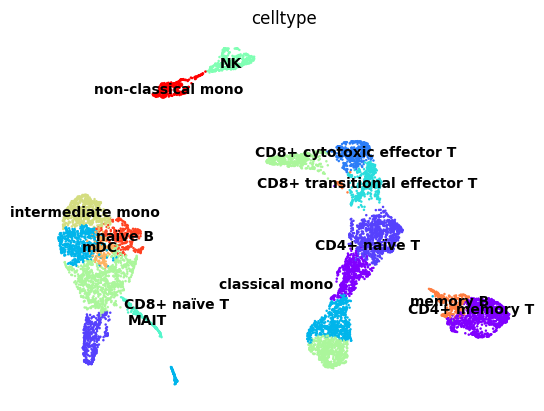

In [127]:
cmap = plt.get_cmap('rainbow')
colors = cmap(np.linspace(0, 1, len(mdata.obs.celltype.cat.categories)))

mdata.uns["celltype_colors"] = list(map(matplotlib.colors.to_hex, colors))
mu.pl.umap(mdata, color="celltype", legend_loc="on data", frameon=False)

In [128]:
mdata['rna'].obs['celltype_joint'] = mdata.obs.celltype
mdata['atac'].obs['celltype_joint'] = mdata.obs.celltype

In [129]:
marker_genes = [
    'IL7R', 'TRAC', 'GATA3',                                # CD4+ T
    'LEF1', 'FHIT', 'RORA', 'ITGB1',                        # naïve/memory
    'CD8A', 'CD8B', 'CD248', 'CCL5',                        # CD8+ T
    'GZMH', 'GZMK',                                         # cytotoxic/transitional effector T cells
    'KLRB1', 'SLC4A10',                                     # MAIT
    'IL32',                                                 # T/NK
    'GNLY', 'NKG7',                                         # NK
    'CD79A', 'MS4A1', 'IGHD', 'IGHM', 'IL4R', 'TNFRSF13C',  # B
    'KLF4', 'LYZ', 'S100A8', 'ITGAM', 'CD14',               # mono
    'DPYD', 'ITGAM',                                        # classical/intermediate/non-classical mono
    'FCGR3A', 'MS4A7', 'CST3',                              # non-classical mono
    'CLEC10A', 'IRF8', 'TCF4'                               # DC
]

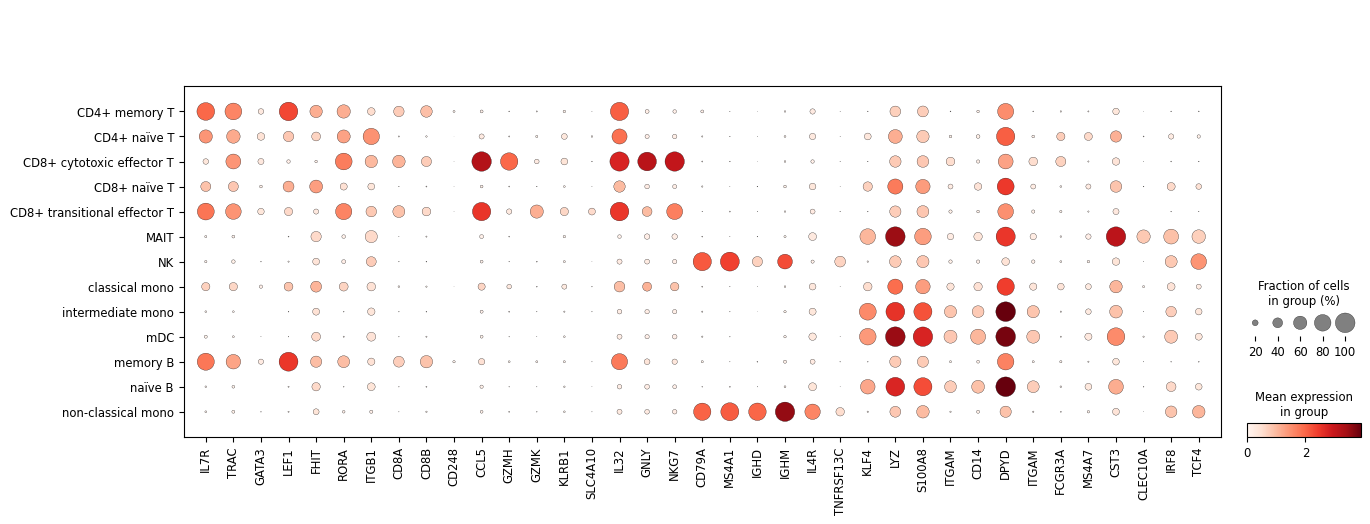

In [130]:
sc.pl.dotplot(mdata['rna'], marker_genes, 'celltype_joint')

In [131]:
marker_peaks = [
    'chr14:99255246-99275454', 'chr10:33135632-33141841',                              # T/NK
    'chr1:1210271-1220028',                                                            # memory T/NK
    'chr2:86783559-86792275',                                                          # CD8+ T/NK
    'chr12:10552886-10555668',                                                         # naïve CD8+ T
    'chr11:114072228-114076352',                                                       # MAIT/NK
    'chr5:150385442-150415310',                                                        # B and mono (CD74)
    'chr22:41931503-41942227', 'chr22:41917087-41929835', 'chr6:167111604-167115345',  # B
    'chr9:107480158-107492721', 'chr5:1476663-1483241',                                # mono
    'chr10:75399596-75404660', 'chr1:220876295-220883526',                             # mDC
    'chr17:81425658-81431769', 'chr7:98641522-98642532',                               # pDC
]

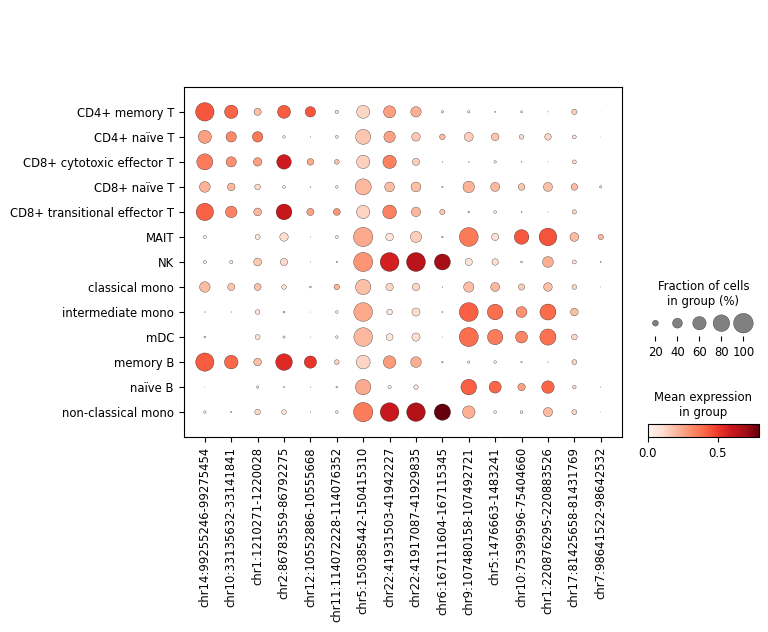

In [132]:
sc.pl.dotplot(mdata['atac'], marker_peaks, 'celltype_joint')

In [133]:
mdata

MuData object with n_obs × n_vars = 9221 × 134726
  obs:	'leiden_joint', 'celltype'
  var:	'gene_ids', 'feature_types', 'genome', 'interval'
  uns:	'neighbors', 'umap', 'leiden_joint', 'leiden_joint_colors', 'celltype_colors'
  obsm:	'X_mofa', 'X_umap'
  obsp:	'distances', 'connectivities'
  2 modalities
    rna:	9221 x 26349
      obs:	'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'celltype', 'leiden_joint', 'celltype_joint'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'rank_genes_groups', 'celltype_colors'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      obsp:	'distances', 'connectivities'
    atac:	9221 x 106086
      obs:	'n_genes_by_counts', 'total_counts', 'NS', 'nucleosome_signal', 'tss_score', 'n_counts', 'leiden', 'celltype', 'leiden_joint', 'celltype_joint'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'atac', 'files', 'log1p', 'hvg', 'lsi', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'rank_genes_groups', 'celltype_colors'
      obsm:	'X_lsi', 'X_pca', 'X_umap'
      varm:	'LSI', 'PCs'
      layers:	'counts'
      obsp:	'distances', 'connectivities'

In [134]:
mdata.obs

rna:n_genes_by_counts  rna:total_counts  \
AAACAGCCAATCCCTT-1                   1896            3771.0   
AAACAGCCAATGCGCT-1                   2904            6876.0   
AAACAGCCAGGATAAC-1                   1353            2759.0   
AAACAGCCAGTAGGTG-1                   3061            7614.0   
AAACAGCCAGTTTACG-1                   1691            3633.0   
...                                   ...               ...   
TTTGTTGGTGACATGC-1                   1586            3285.0   
TTTGTTGGTGTTAAAC-1                   1525            2866.0   
TTTGTTGGTTAGGATT-1                   2024            4148.0   
TTTGTTGGTTGGTTAG-1                   1620            2976.0   
TTTGTTGGTTTGCAGA-1                   1920            4505.0   

                    rna:total_counts_mt  rna:pct_counts_mt rna:leiden  \
AAACAGCCAATCCCTT-1                397.0          10.527711          0   
AAACAGCCAATGCGCT-1                444.0           6.457242          3   
AAACAGCCAGGATAAC-1                191.0           6.922798          3   
AAACAGCCAGTAGGTG-1                525.0           6.895193          2   
AAACAGCCAGTTTACG-1                152.0           4.183870          0   
...                                 ...                ...        ...   
TTTGTTGGTGACATGC-1                358.0          10.898022          2   
TTTGTTGGTGTTAAAC-1                317.0          11.060712          2   
TTTGTTGGTTAGGATT-1                412.0           9.932498          7   
TTTGTTGGTTGGTTAG-1                159.0           5.342742          0   
TTTGTTGGTTTGCAGA-1                336.0           7.458380          5   

                         rna:celltype  atac:n_genes_by_counts  \
AAACAGCCAATCCCTT-1      CD4+ memory T                    7253   
AAACAGCCAATGCGCT-1       CD4+ naïve T                    6528   
AAACAGCCAGGATAAC-1       CD4+ naïve T                    4267   
AAACAGCCAGTAGGTG-1  intermediate mono                   11633   
AAACAGCCAGTTTACG-1      CD4+ memory T                    7245   
...                               ...                     ...   
TTTGTTGGTGACATGC-1  intermediate mono                    5718   
TTTGTTGGTGTTAAAC-1  intermediate mono                    6629   
TTTGTTGGTTAGGATT-1                 NK                    4267   
TTTGTTGGTTGGTTAG-1      CD4+ memory T                    6367   
TTTGTTGGTTTGCAGA-1   CD8+ activated T                    7574   

                    atac:total_counts  atac:NS  atac:nucleosome_signal  \
AAACAGCCAATCCCTT-1            20495.0        1                0.769231   
AAACAGCCAATGCGCT-1            16674.0        1                1.333333   
AAACAGCCAGGATAAC-1            10355.0        1                0.562500   
AAACAGCCAGTAGGTG-1            39454.0        1                0.840000   
AAACAGCCAGTTTACG-1            20523.0        1                0.473684   
...                               ...      ...                     ...   
TTTGTTGGTGACATGC-1            15272.0        1                1.476190   
TTTGTTGGTGTTAAAC-1            17869.0        1                0.638889   
TTTGTTGGTTAGGATT-1            10558.0        1                0.941176   
TTTGTTGGTTGGTTAG-1            17054.0        1                1.107143   
TTTGTTGGTTTGCAGA-1            22729.0        1                0.657143   

                    atac:tss_score  atac:n_counts atac:leiden  \
AAACAGCCAATCCCTT-1        2.667005    6072.373535           1   
AAACAGCCAATGCGCT-1        3.450756    6609.848633           3   
AAACAGCCAGGATAAC-1        6.637142    5088.182617           3   
AAACAGCCAGTAGGTG-1        4.460259    7149.872070           2   
AAACAGCCAGTTTACG-1        5.451524    6339.664551           1   
...                            ...            ...         ...   
TTTGTTGGTGACATGC-1        4.266250    5509.185547           2   
TTTGTTGGTGTTAAAC-1        2.709174    6350.276855           2   
TTTGTTGGTTAGGATT-1        4.149198    5335.365723           7   
TTTGTTGGTTGGTTAG-1        4.287674    6143.921387           1   
T

In [135]:
mdata.var

rna:mt  rna:n_cells_by_counts  rna:mean_counts  \
AL627309.1               False                   83.0         0.007389   
AL627309.5               False                  532.0         0.048703   
AL627309.4               False                   55.0         0.004702   
AL669831.2               False                   11.0         0.000924   
LINC01409                False                  631.0         0.059955   
...                        ...                    ...              ...   
KI270713.1:20444-22615    <NA>                    NaN              NaN   
KI270713.1:27118-28927    <NA>                    NaN              NaN   
KI270713.1:29485-30706    <NA>                    NaN              NaN   
KI270713.1:31511-32072    <NA>                    NaN              NaN   
KI270713.1:37129-37638    <NA>                    NaN              NaN   

                        rna:pct_dropout_by_counts  rna:total_counts  \
AL627309.1                              99.303048              88.0   
AL627309.5                              95.532790             580.0   
AL627309.4                              99.538164              56.0   
AL669831.2                              99.907633              11.0   
LINC01409                               94.701486             714.0   
...                                           ...               ...   
KI270713.1:20444-22615                        NaN               NaN   
KI270713.1:27118-28927                        NaN               NaN   
KI270713.1:29485-30706                        NaN               NaN   
KI270713.1:31511-32072                        NaN               NaN   
KI270713.1:37129-37638                        NaN               NaN   

                        rna:highly_variable  rna:means  rna:dispersions  \
AL627309.1                            False   0.016339         1.017805   
AL627309.5                            False   0.094466         0.949410   
AL627309.4                            False   0.009635         0.956101   
AL669831.2                            False   0.002422         1.002356   
LINC01409                             False   0.130029         1.184810   
...                                     ...        ...              ...   
KI270713.1:20444-22615                 <NA>        NaN              NaN   
KI270713.1:27118-28927                 <NA>        NaN              NaN   
KI270713.1:29485-30706                 <NA>        NaN              NaN   
KI270713.1:31511-32072                 <NA>        NaN              NaN   
KI270713.1:37129-37638                 <NA>        NaN              NaN   

                        rna:dispersions_norm  rna:mean   rna:std  \
AL627309.1                         -0.440746  0.008186  0.100294   
AL627309.5                         -0.650060  0.050385  0.240122   
AL627309.4                         -0.629582  0.004966  0.076425   
AL669831.2                         -0.488026  0.001186  0.038952   
LINC01409                           0.070350  0.064993  0.285072   
...                                      ...       ...       ...   
KI270713.1:20444-22615                   NaN       NaN       NaN   
KI270713.1:27118-28927                   NaN       NaN       NaN   
KI270713.1:29485-30706                   NaN       NaN       NaN   
KI270713.1:31511-32072                   NaN       NaN       NaN   
KI270713.1:37129-37638                   NaN       NaN       NaN   

                                      gene_ids    feature_types  genome  \
AL627309.1                     ENSG00000238009  Gene Expression  GRCh38   
AL627309.5                     ENSG00000241860  Gene Expression  GRCh38   
AL627309.4                     ENSG00000241599  Gene Expression  GRCh38   
AL669831.2                     ENSG00000229905  Gene Expression  GRCh38   
LINC01409                      ENSG00000237491  Gene Expression  GRCh38   
...                                        ...              ...     ...   
KI270713.1:20444-22615  KI270713.1:2044

In [ ]:
mdata.write("pbmc10k.h5mu")